In [1]:
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

# import modules
import numpy as np, pandas as pd
import matplotlib as mpl, matplotlib.pyplot as plt

pd.set_option('notebook_repr_html', True)
pd.set_option('expand_frame_repr', False)

import seaborn as sns
sns.set(font_scale=1.1, rc={'figure.figsize': (10, 6), 
    'axes.facecolor': 'white', 'figure.facecolor': 'white', 
    'grid.linewidth': 0.5, 'lines.linewidth': 1.5, 
    'grid.color': '#dddddd', 'text.color': '#333333', 
    'xtick.color': '#666666', 'ytick.color': '#666666'})

# flat ui colors
sns.set_palette(["#3976a8", "#af4b64", "#fede82", "#3399cc",
                 "#4fa487", "#9b59b6", "#95a5a6", "#ee8659", 
                 "#4f6c86", "#254a82", "#c5a06e", "#cbb1b8"])

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

ModuleNotFoundError: No module named 'tabulate'

In [23]:
# method for plotting candlesticks

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

def plot_candlestick(df, ax=None, fmt="%Y-%m-%d", cols=["open", "high", "low", "close"]):
    if ax is None:
        fig, ax = plt.subplots()
        
    idx_name = df.index.name
    dat = df.reset_index()[[idx_name]+cols]
    dat[df.index.name] = dat[df.index.name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("Price")
    return ax

<img style="xfloat:right; max-width:128px!important;margin: 0 0 2rem" src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg">

<h1 style="margin-top:0">Python for Trading</h1>

---

### Getting Started with Python for Algorithmic Trading

<br clear="all">


**Ran Aroussi**<br>
Founder @ [Tradologics](http://tradologics.com)<br>
[@aroussi](http://twitter.com/aroussi) | [aroussi.com](http://aroussi.com) | [github.com/ranaroussi](https://github.com/ranaroussi)


<br><small>&copy; 2020. All rights reserved.</small>

# Agenda

- Python for Trading
- Trading strategy workflow
- Time-series analysis
- Backtesting
- Performance & risk metrics
- Strategy optimization

<img style="float:right;max-width:100px!important;border-radius:50%;margin:10px 0" src="https://aroussi.com/assets/img/avatar.png">

# About me

- Programming since I was 13 (33 years 😲) in various languages and disciplines
- Trading since 2013 (switched to automated trading in 2014)
- Created several popular Python libraries, with ~40K monthly installs
- Writing a book on "Python for Trading" for O'Reilly Media
- Founder of <a href="https://tradologics.com">Tradologics</a> - a cloud platform for algorithmic traders


...

**Please follow me on [Twitter](http://twitter.com/aroussi) and [Github](https://github.com/ranaroussi) for ongoing Python and Trading stuff**

# Python for Trading

## Why Python?

- A very high-level language with clean and readable syntax
- Fast learning curve
- Object-oriented, multi-paradigm
- A rich standard library of modules 
- One of the most used languages in IoT, **data science**, finance, and web development
- A strong open-source community

## Python for Algorithmic Trading

- Python's syntax is attractive for science, and particularly finance
- Fast learning curve
- Large selection of ML libraries
- Quick protopyting, fast enough execution
- Many libraries and tools available for trading ([Zipline](https://github.com/quantopian), [PyAlgoTrade](https://github.com/gbeced/pyalgotrade), [PyBacktest](https://github.com/ematvey/pybacktest), [QTPyLib](https://github.com/ranaroussi/qtpylib))
- **Pandas + Numpy**

## But wait? Isn't Python slow?

# Working with Time-series data

In [2]:
!dir

 Volume in drive D is Big Disk
 Volume Serial Number is 2C35-1706

 Directory of D:\Itay\Downloads\d_us_txt\src

07/02/2024  08:41 PM    <DIR>          .
07/02/2024  08:41 PM    <DIR>          ..
02/10/2024  05:06 AM    <DIR>          .ipynb_checkpoints
01/20/2024  08:22 PM                 0 grapher.py
07/02/2024  08:41 PM         3,254,356 notebook.ipynb
04/23/2020  10:11 PM             6,923 optimizeparams.py
04/23/2020  10:11 PM             1,150 README.md
04/23/2020  10:11 PM         3,560,518 slides.html
02/25/2024  02:08 AM             1,113 ta.ipynb
               6 File(s)      6,824,060 bytes
               3 Dir(s)  1,904,719,982,592 bytes free


In [3]:
import yfinance as yf

df = yf.download('TSLA', period="max", auto_adjust=True)
df.columns = map(str.lower, df.columns)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
Date,,,,,
2024-06-25,184.399994,187.970001,182.009995,187.350006,63678300
2024-06-26,186.539993,197.759995,186.360001,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,95438100
2024-07-01,201.020004,213.229996,200.850006,209.860001,135355700


<Axes: title={'center': 'TSLA Closing Price'}, xlabel='Date'>

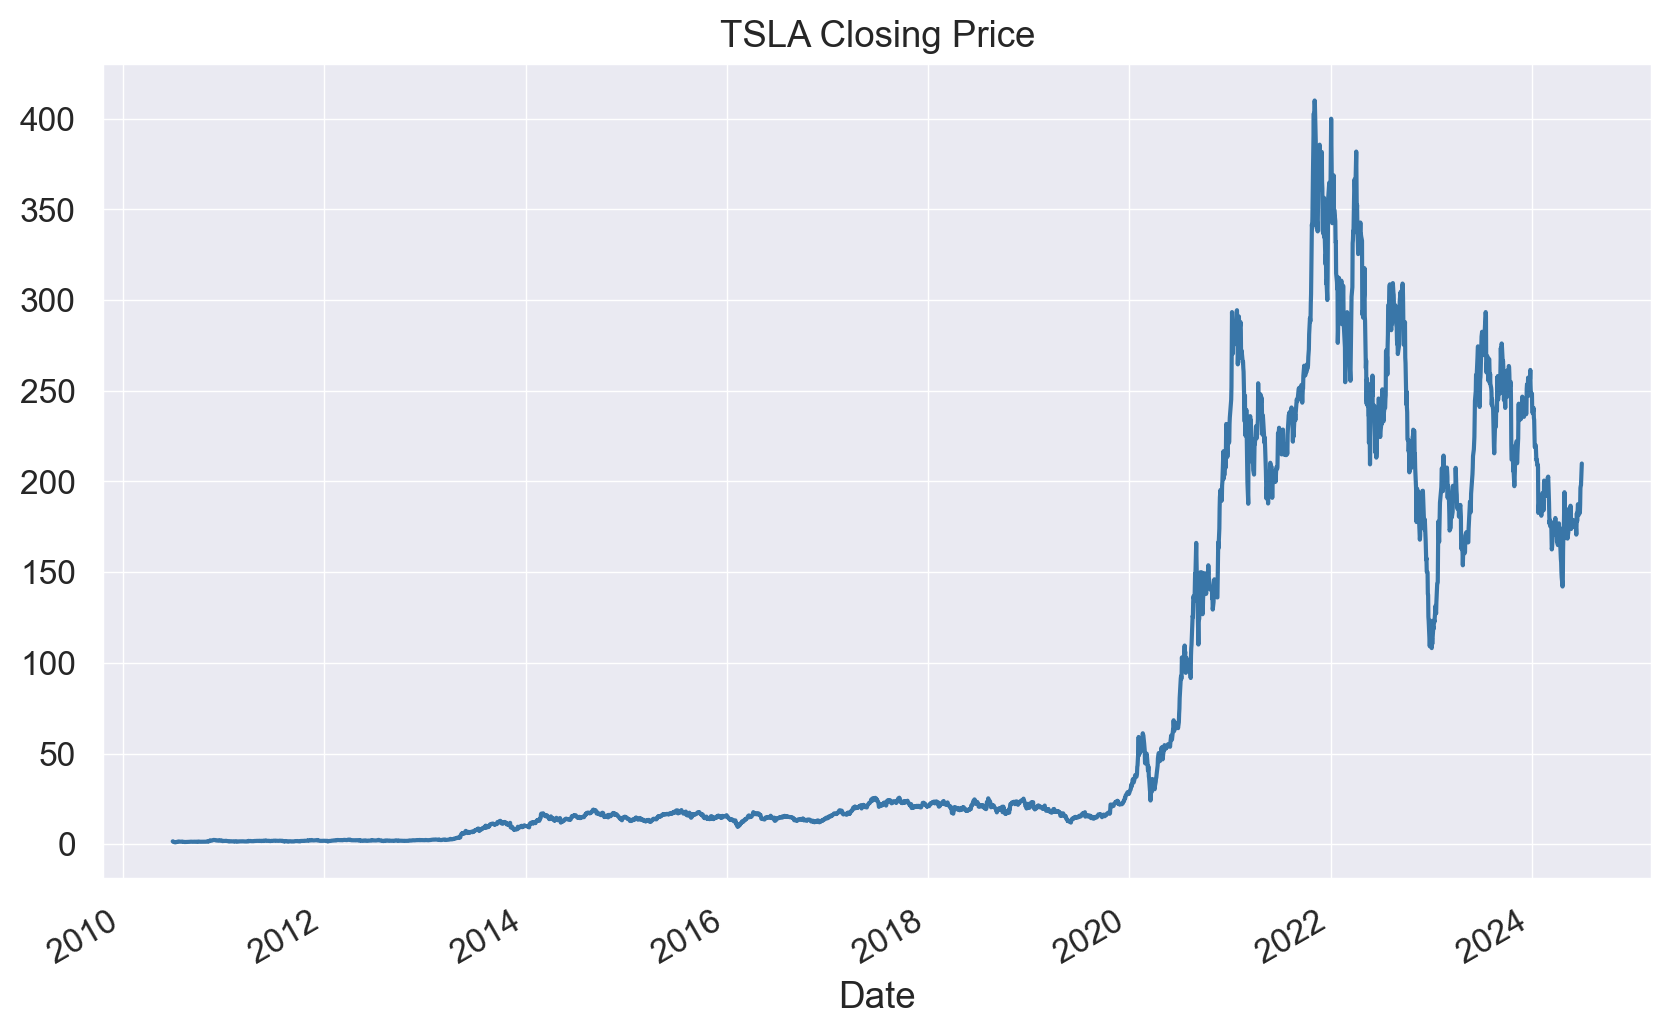

In [4]:
df['close'].plot(title="TSLA Closing Price")

# Data Exploration

<Axes: title={'center': 'TSLA Daily Returns'}, xlabel='Date'>

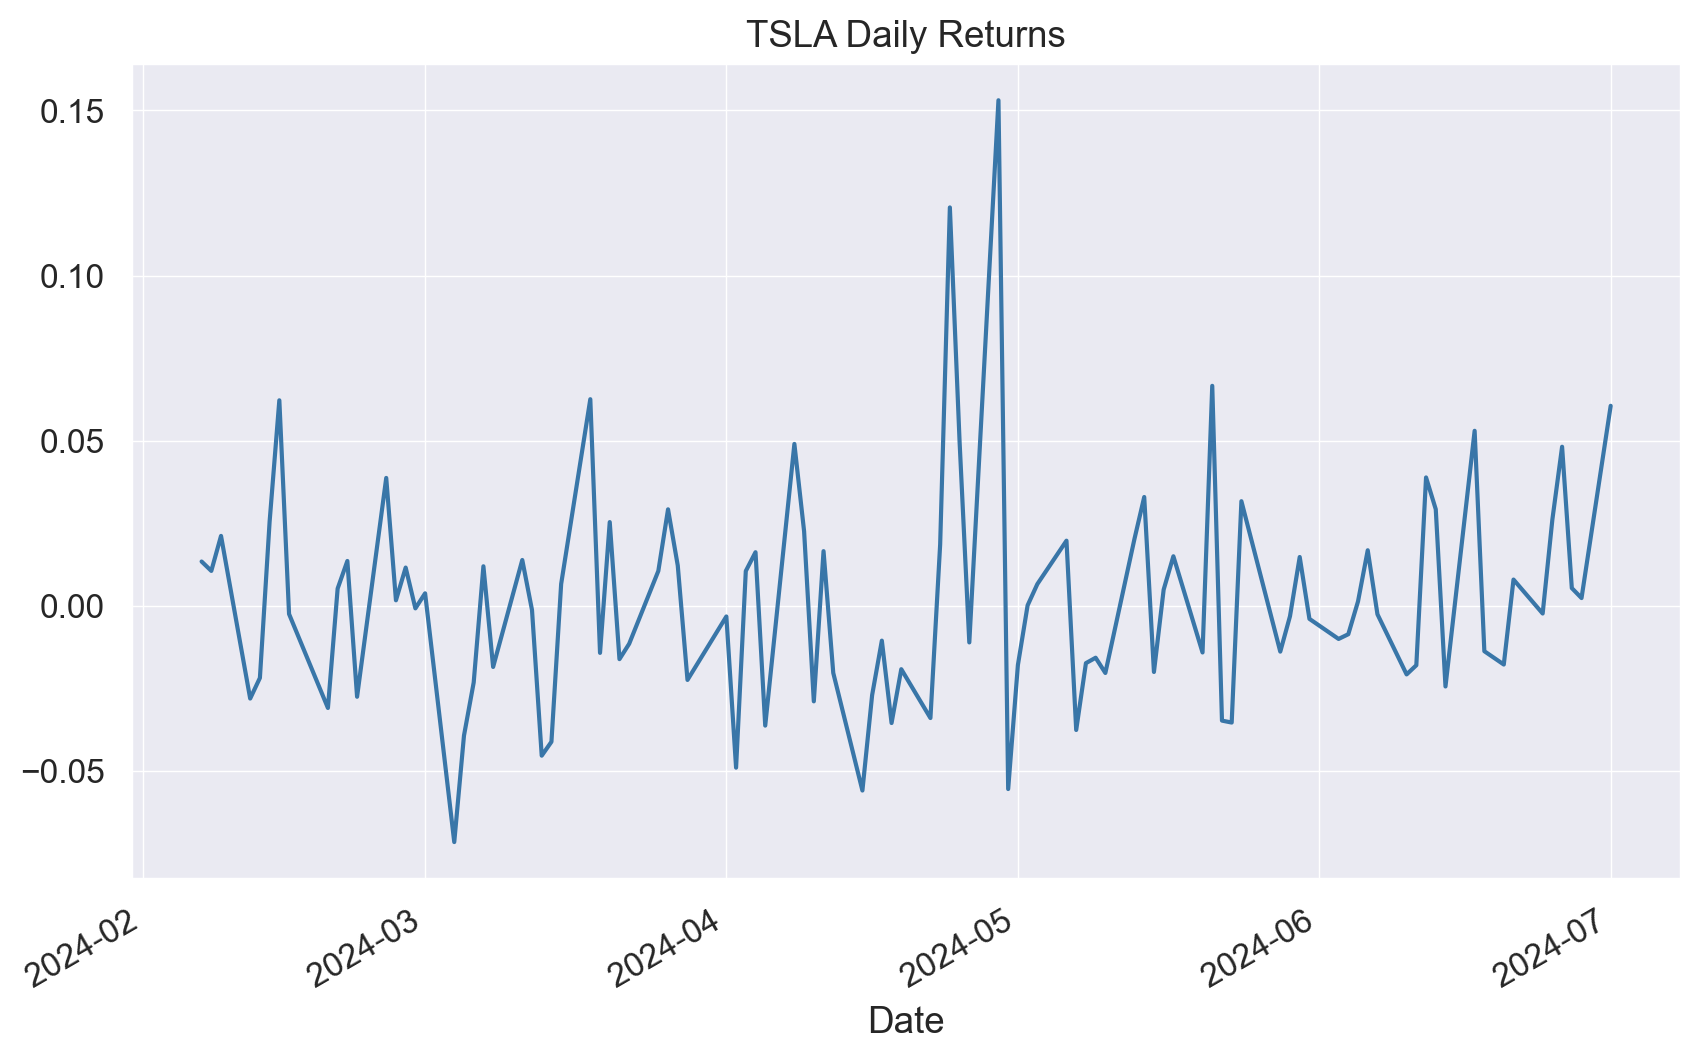

In [10]:
df['returns'] = df['close'].pct_change()
df['returns'][-100:].plot(title="TSLA Daily Returns")

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

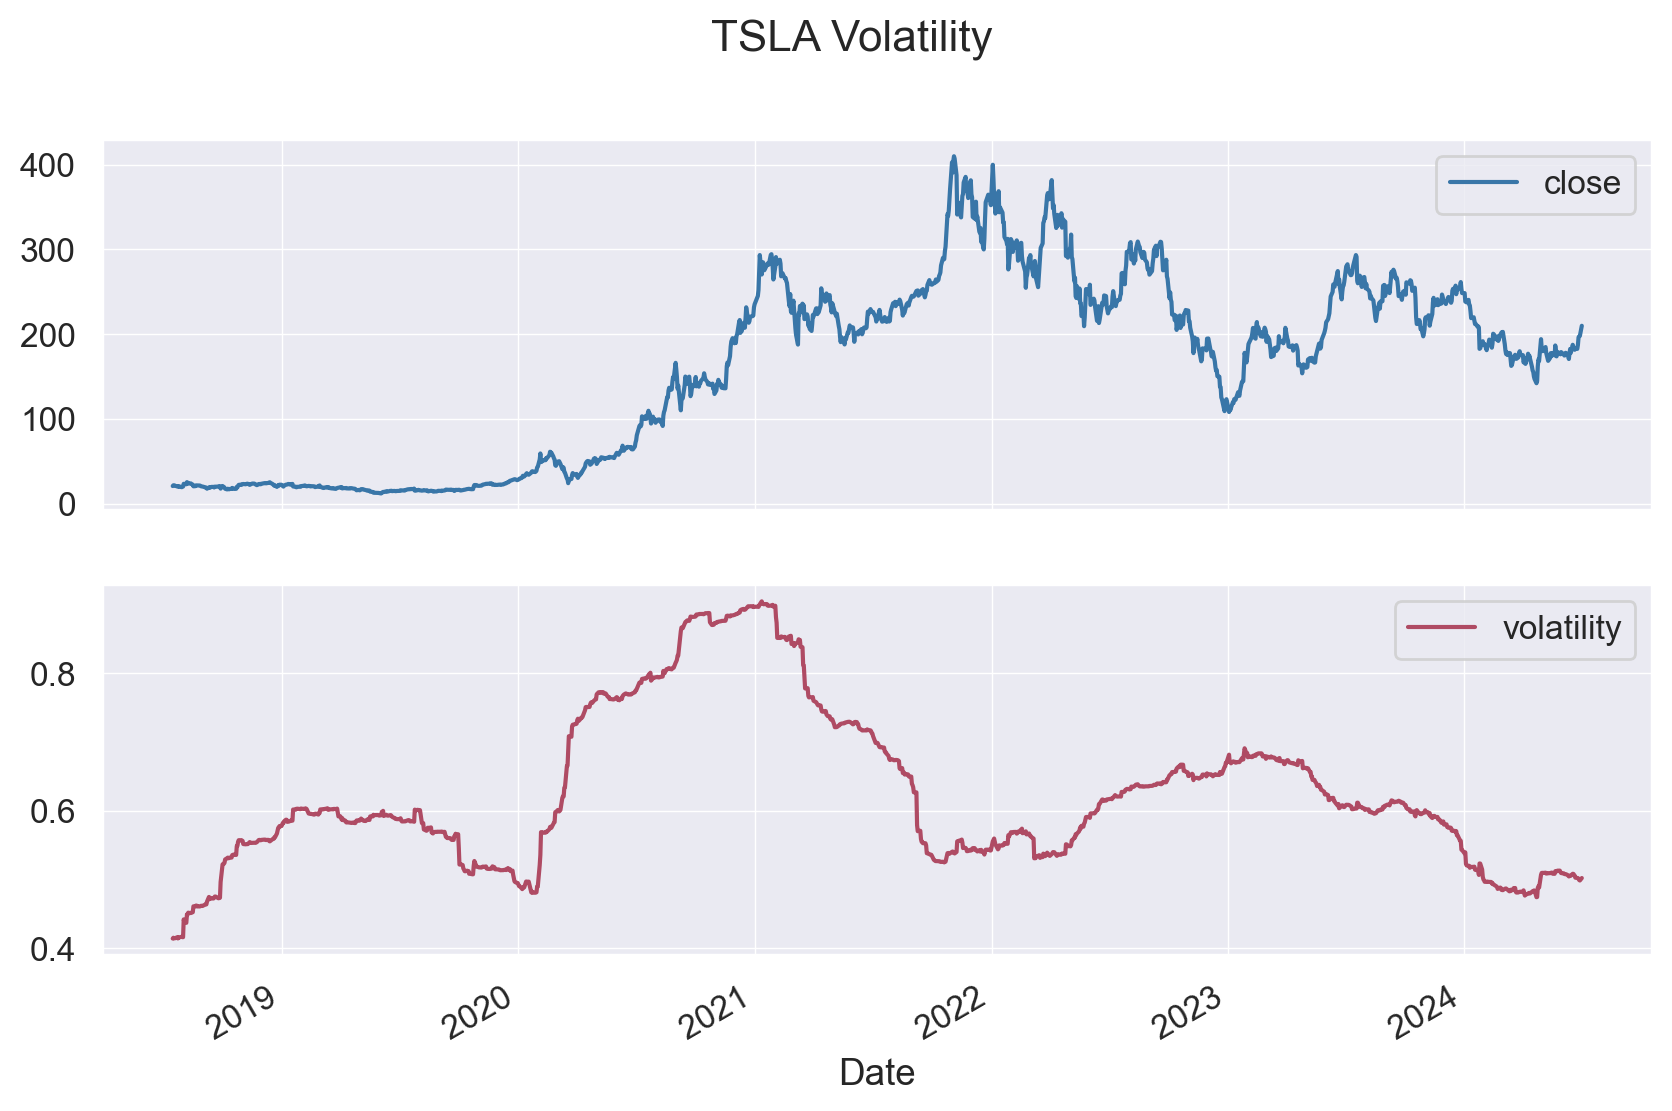

In [5]:
df['log_ret'] = np.log(df['close'] / df['close'].shift(1))
df['volatility'] = df['log_ret'].rolling(window=252).std() * np.sqrt(252)

df[['close', 'volatility']][-1500:].plot(
    title="TSLA Volatility", subplots=True)

<Axes: title={'center': 'TSLA Price + SMA 100'}, xlabel='Date'>

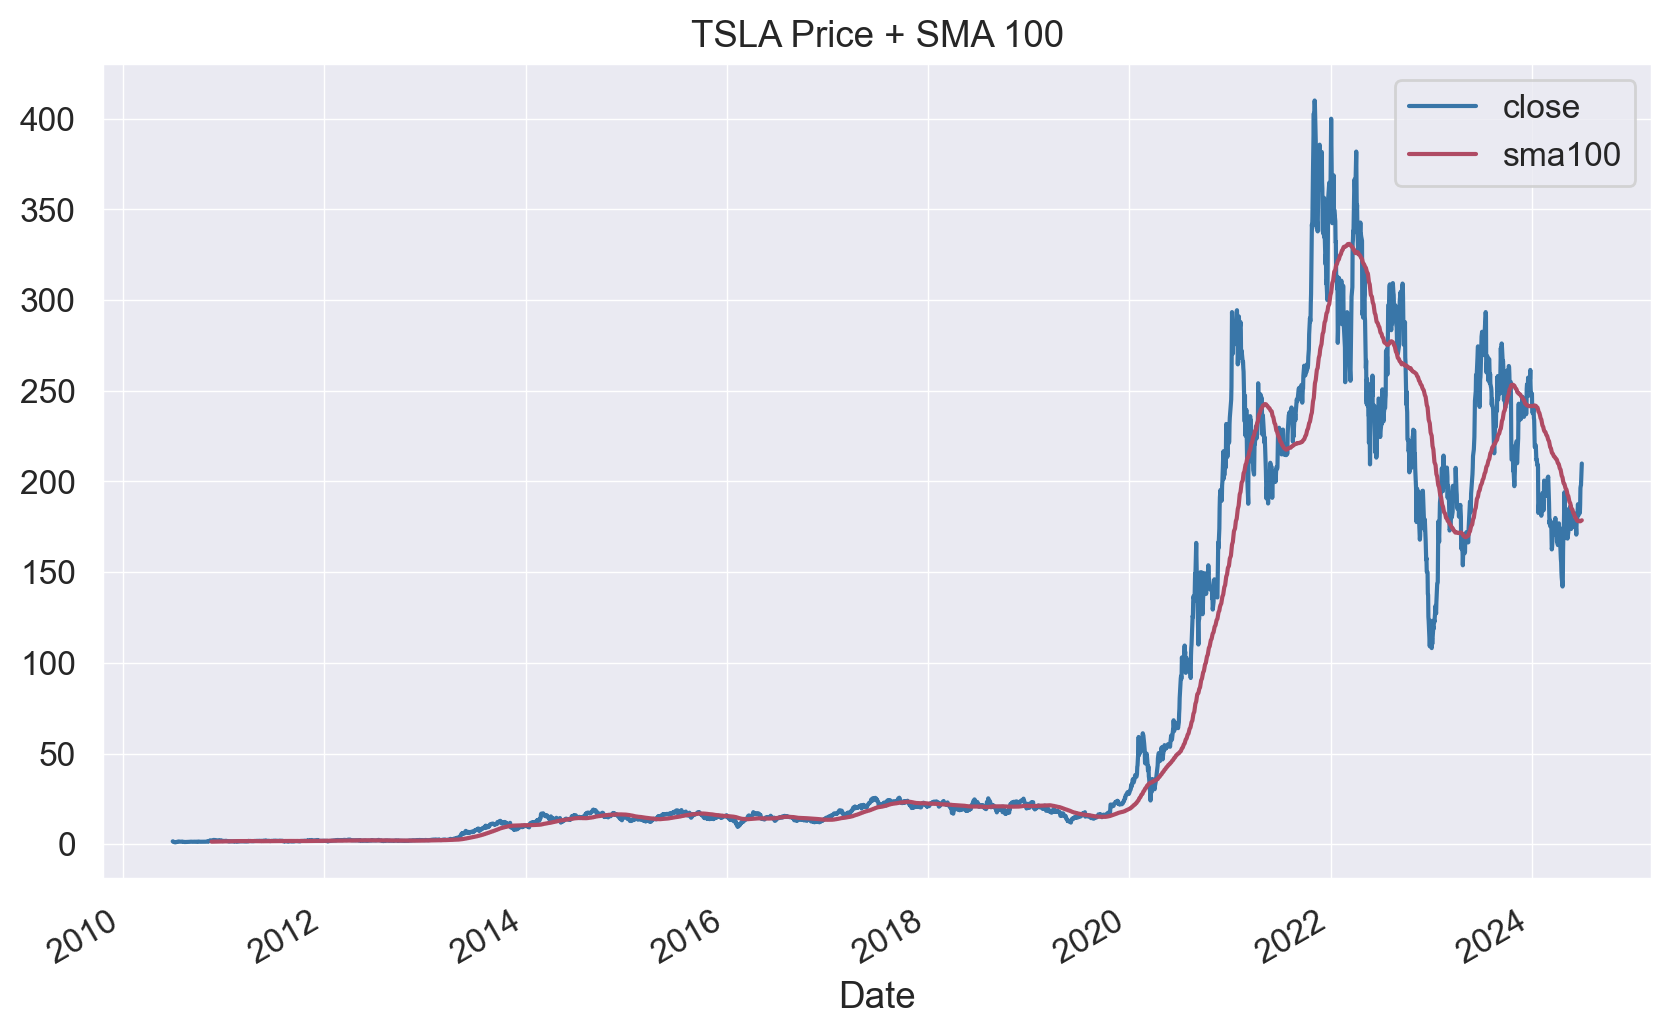

In [6]:
df['sma100'] = df['close'].rolling(100).mean()
df[['close', 'sma100']].plot(title="TSLA Price + SMA 100")

<Axes: title={'center': 'TSLA Daily Returns + SMA 5'}, xlabel='Date'>

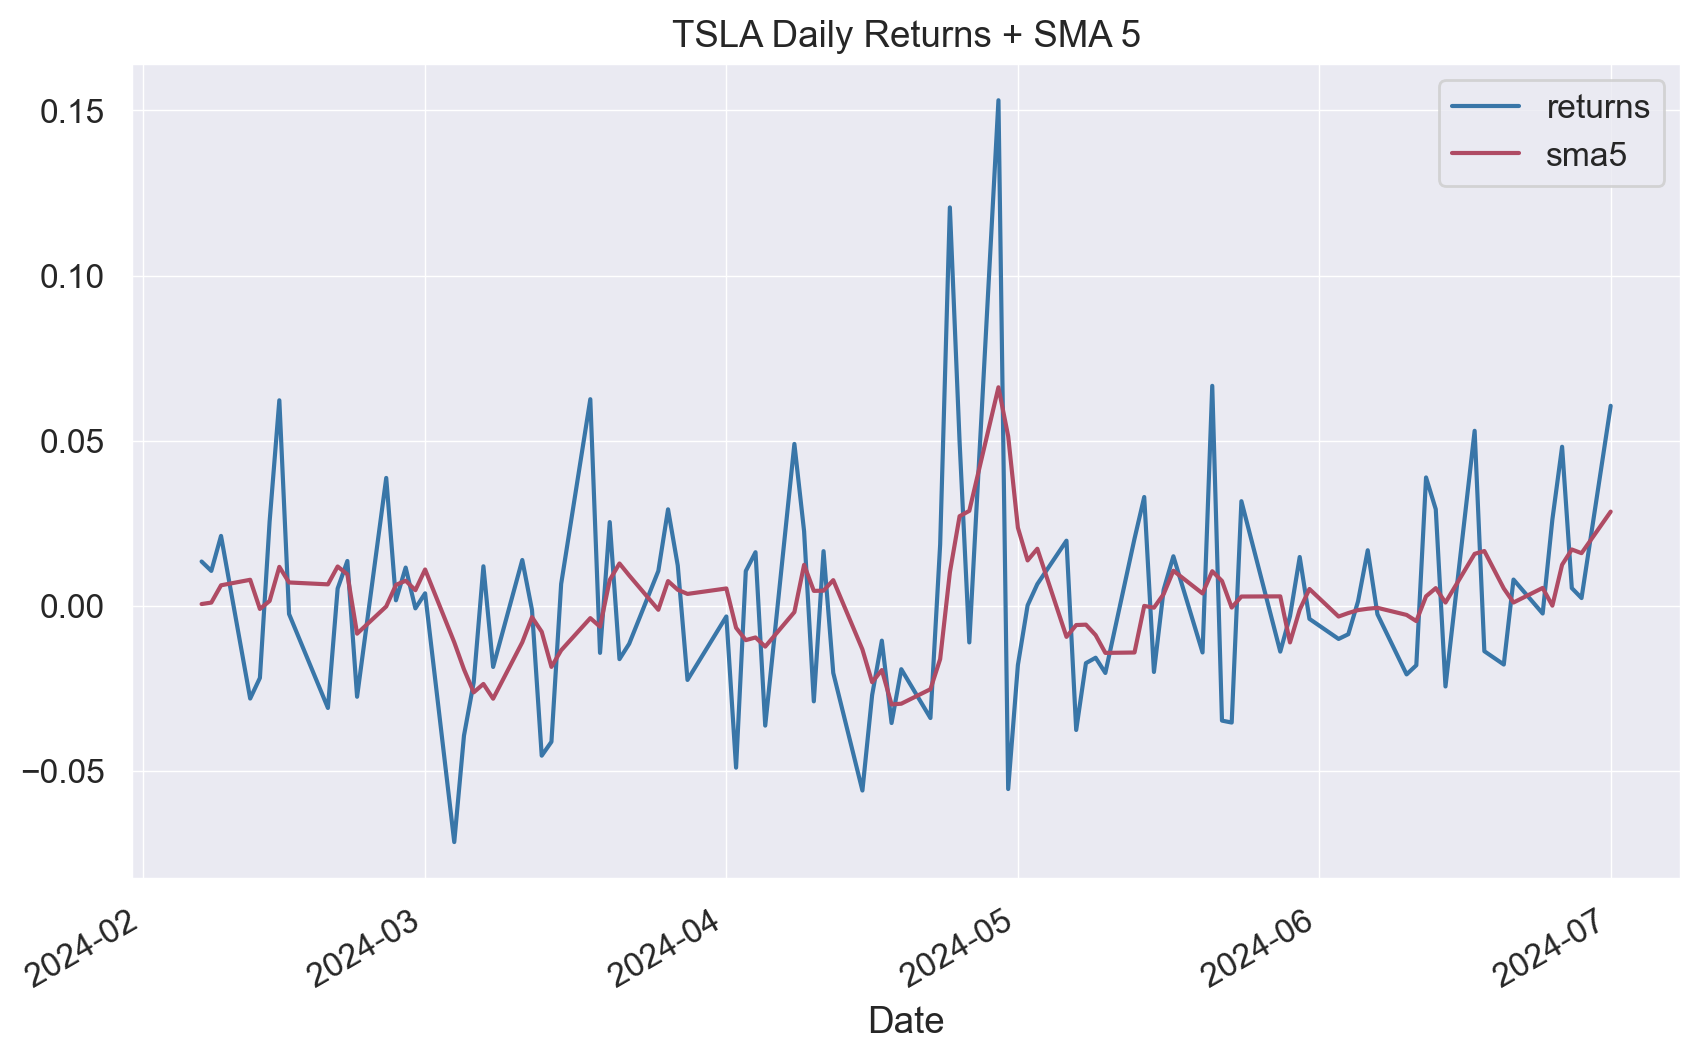

In [11]:
df['sma5'] = df['returns'].rolling(5).mean()
df[['returns', 'sma5']][-100:].plot(title="TSLA Daily Returns + SMA 5")

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

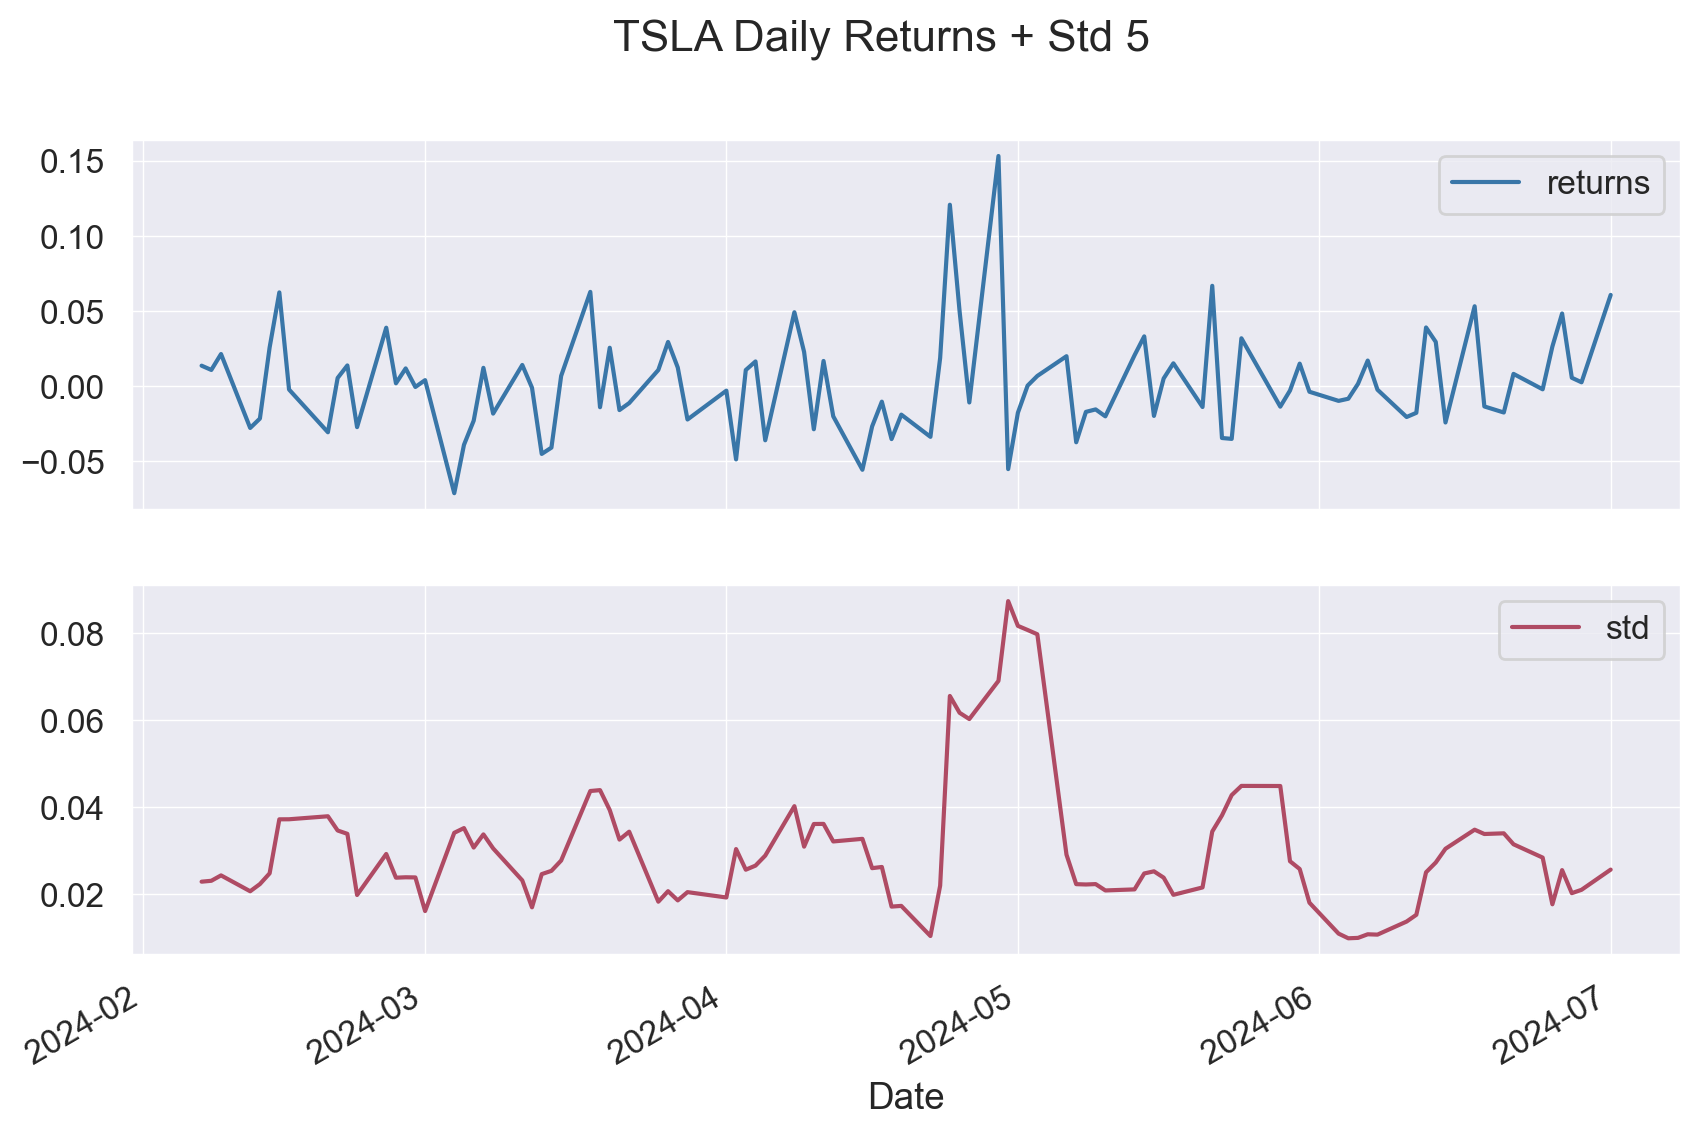

In [12]:
df['std'] = df['returns'].rolling(5).std()

df[['returns', 'std']][-100:].plot(
    title="TSLA Daily Returns + Std 5", subplots=True)


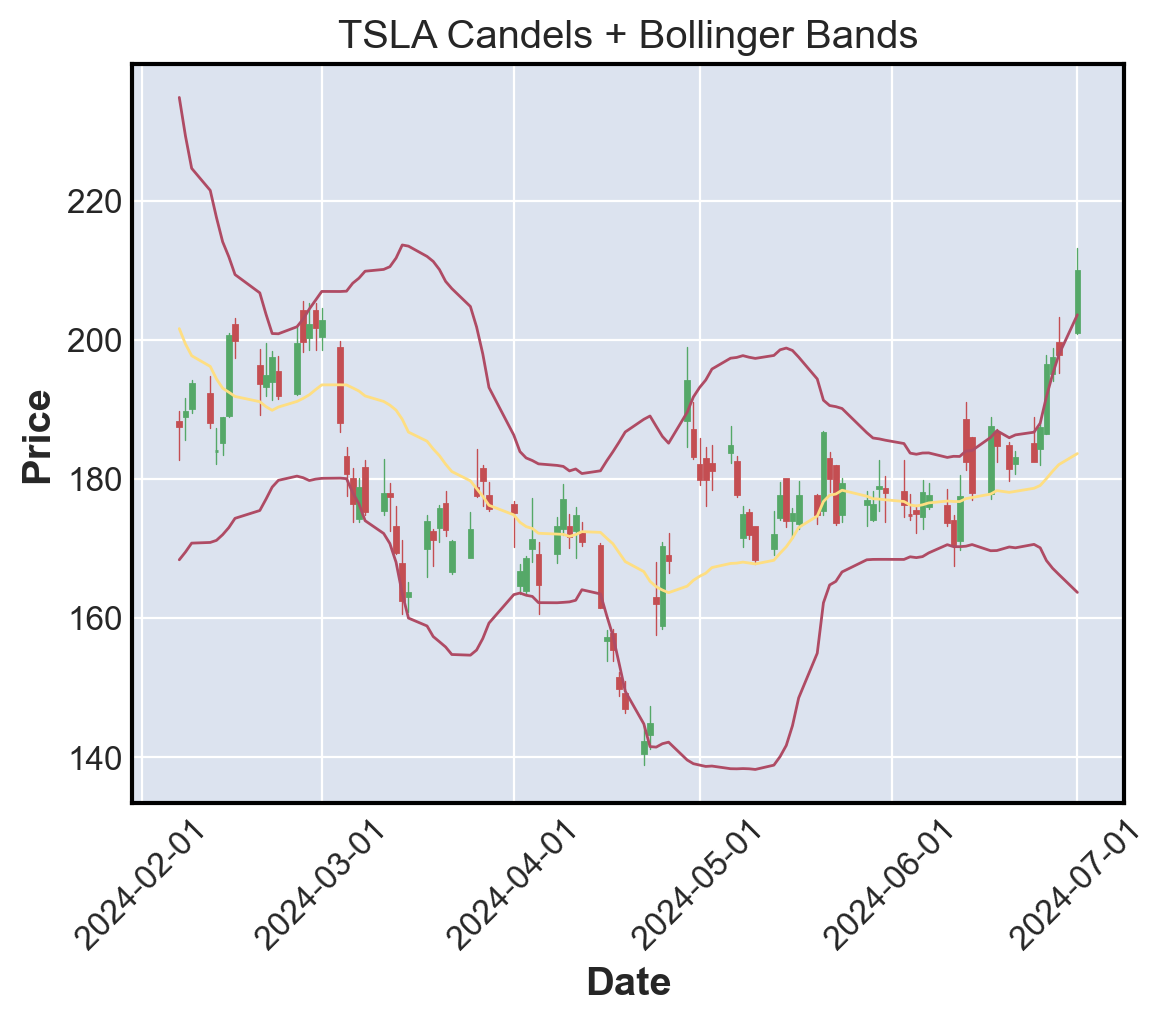

In [25]:
# pure python bollinger bands
df['sma'] = df['close'].rolling(window=20).mean()
df['std'] = df['close'].rolling(window=20).std()

df['upperbb'] = df['sma'] + (df['std'] * 2)
df['lowerbb'] = df['sma'] - (df['std'] * 2)

ax = plot_candlestick(df[-100:])
ax.plot(df[-100:][['upperbb', 'lowerbb']], color="#af4b64", linewidth=1)
ax.plot(df[-100:][['sma']], color="#fede82", linewidth=1)
plt.title('TSLA Candels + Bollinger Bands')
plt.show()

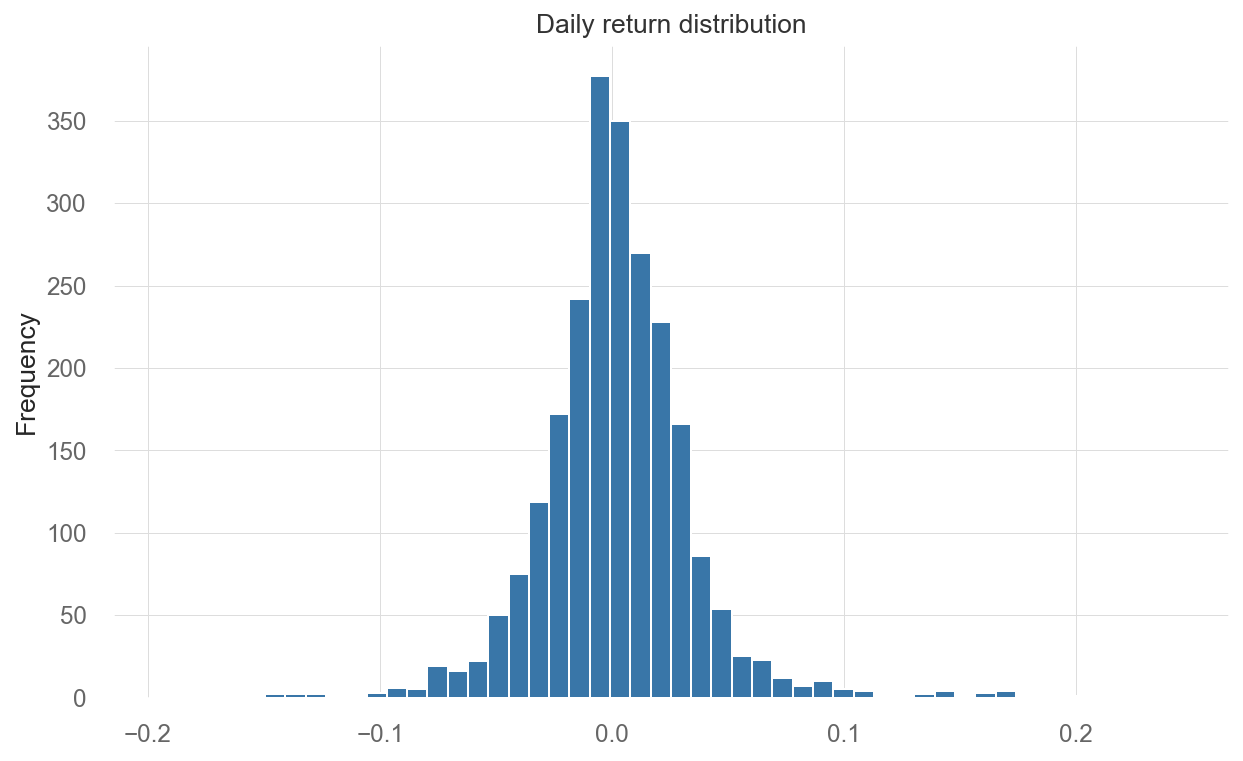

In [13]:
df['returns'].plot.hist(bins=50, title="Daily return distribution")

[*********************100%***********************]  4 of 4 completed


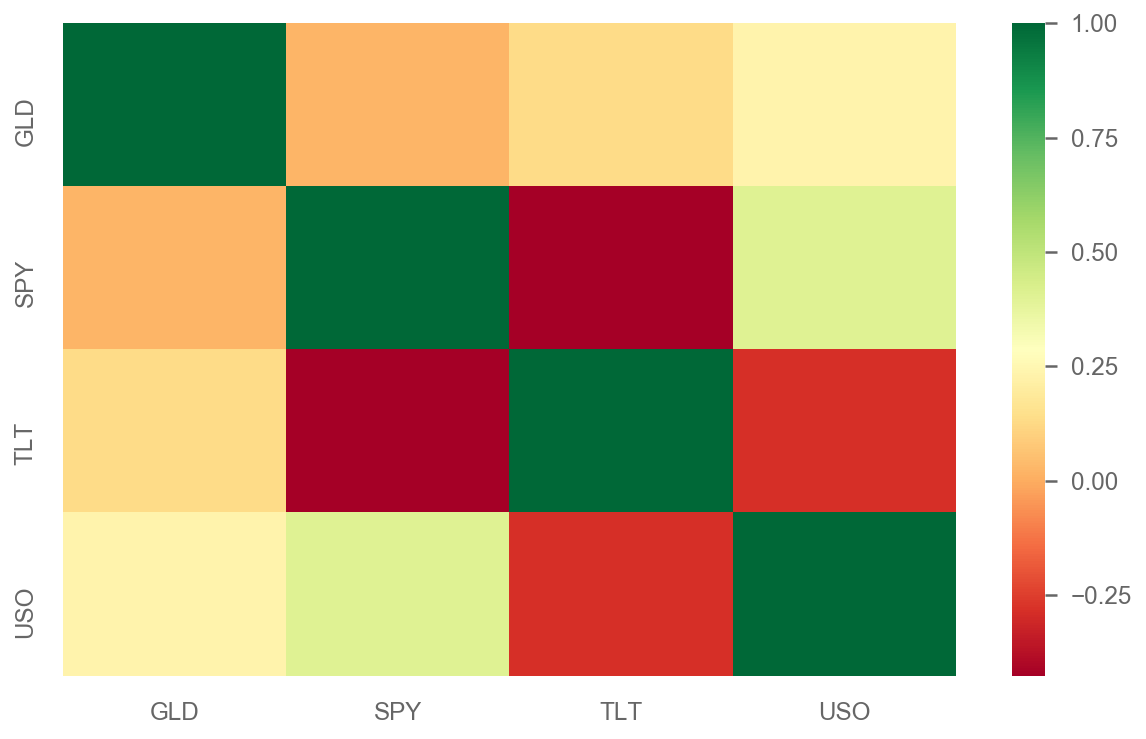

In [14]:
basket = yf.download("GLD TLT SPY USO")['Adj Close'].pct_change().dropna()
sns.heatmap(basket.corr(), cmap="RdYlGn")

In [15]:
df.describe()

,open,high,low,close,volume,returns,log_ret,volatility,sma100,sma5,std,sma,upperbb,lowerbb
count,2374.000000,2374.000000,2374.000000,2374.000000,2.374000e+03,2373.000000,2373.000000,2122.000000,2275.000000,2369.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,181.480299,184.620783,178.172713,181.496487,5.395288e+06,0.001637,0.001113,0.491208,182.776234,0.001692,8.908786,181.506671,199.324243,163.689099
std,113.465900,115.209477,111.610573,113.487016,4.706548e+06,0.032506,0.032319,0.099467,110.120620,0.014208,6.922657,112.489828,123.007040,102.764665
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,-0.193274,-0.214772,0.316833,20.987900,-0.077369,0.332243,19.278000,20.823474,15.278575
25%,34.050001,34.735001,33.452500,34.182500,1.827275e+06,-0.014584,-0.014692,0.397049,33.160050,-0.006487,2.085381,34.163500,36.371567,31.867428
50%,211.279999,215.115005,207.509995,210.945000,4.499900e+06,0.000708,0.000708,0.507521,214.903300,0.001545,8.287850,213.305499,233.364467,192.410784
75%,262.362495,265.630013,257.955002,262.077492,7.199875e+06,0.017734,0.017579,0.569972,253.387000,0.009823,12.674337,263.089005,285.219144,239.450863
max,386.690002,389.609985,379.350006,385.000000,3.716390e+07,0.243951,0.218292,0.697556,351.352299,0.092223,36.927099,368.637997,408.489764,349.252567


In [16]:
df['close'].resample('1W').ohlc().tail(10)

,open,high,low,close
Date,,,,
2019-10-06,240.869995,244.690002,231.429993,231.429993
2019-10-13,237.720001,247.889999,237.720001,247.889999
2019-10-20,256.959991,261.970001,256.950012,256.950012
2019-10-27,253.500000,328.130005,253.500000,328.130005
2019-11-03,327.709991,327.709991,313.309998,313.309998
2019-11-10,317.470001,337.140015,317.220001,337.140015
2019-11-17,345.089996,352.170013,345.089996,352.170013
2019-11-24,349.989990,359.519989,333.040009,333.040009
2019-12-01,336.339996,336.339996,328.920013,329.940002


In [27]:
df['close'].resample('3B').ohlc().tail(10)

,open,high,low,close
Date,,,,
2024-05-23,173.740005,179.240005,173.740005,179.240005
2024-05-28,176.750000,178.789993,176.190002,178.789993
2024-05-31,178.080002,178.080002,174.770004,174.770004
2024-06-05,175.000000,177.940002,175.000000,177.479996
2024-06-10,173.789993,177.289993,170.660004,177.289993
2024-06-13,182.470001,187.440002,178.009995,187.440002
2024-06-18,184.860001,184.860001,181.570007,181.570007
2024-06-21,183.009995,187.350006,182.580002,187.350006
2024-06-26,196.369995,197.880005,196.369995,197.880005


# Trading Strategy Workflow

- Hypothesis
- Prototyping
- Backtesting
- Assessing performance
- Optimizing
- Going live

## Hypothesis

- Markets are mean-reverting
- After a big down day, smart buyers swoops in to buy at lower price

Our strategy:

    BUY ON CLOSE when SPY drops 0.5% (or more)
    SELL ON CLOSE of next day

## Prototyping / Quick (Vectorized) Backtesting

### Pros:

- Very fast - great for quickly testing ideas
- Requires much less coding compared to alternatives

### Cons:

- Danger of data snooping
- Usually cannot be used "as-is" for live trading

### Example:

In [32]:
df = yf.download('SPY', start='2000-01-01', auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [33]:
%%time

df['SPY'] = df['Close'].pct_change()
df['Strategy'] = df[df['SPY'].shift(1) <= -0.005]['SPY']

CPU times: total: 0 ns
Wall time: 4 ms


In [34]:
df[['SPY', 'Strategy']].fillna(0).compsum().plot(title='SPY vs. Strategy')

AttributeError: 'DataFrame' object has no attribute 'compsum'

## Event-Based Backtesting

**Once we've tested our hypothesis, it's time to use an event-based backtester to avoid look-ahead bias (among many other biases)**


### Pros:

- More reliable backtesting (no look-ahead bias)
- Code can be used "as-is" for live trading

### Cons:

- Takes longer to write and run your backtest

### Example:

In [35]:
%%time
for ix, _ in df.iterrows():
    loc = df.index.get_loc(ix)
    if loc > 0:
        yday = (df.iloc[loc - 1] / df.iloc[loc - 2])['Close']
        if yday <= -0.005:
            df.loc[ix, "strategy"] = (df.iloc[loc] / df.iloc[loc - 1])['Close']

CPU times: total: 2.08 s
Wall time: 2.07 s


# Assessing Performance

## Basic Performance Metrics

- **Sharpe Ratio** - risk adjusted return of investment
- **Max Drawdown** - max hole (and it's duration)
- **Recovery Factor** - how quickly the strategy recovers from drawdowns (net profit/max dd)
- **CAGR (Compound Annual Growth Rate)** - annualized % growth return 
- **Profit Factor** - profit from winning trades / losses from losing trades
- **Win Rate** - % of trades with a net profit > 0
- **Yearly/Monthly/Quarterly/Daily/Hourly Breakdown** - seasonality discovery
- **Avg. Return per Trade**
- **Avg. Return from Winners/Losers per Trade**
- **Total Returns**

## Sharpe Ratio

<br><big><code>Sharpe(X) = (rX - Rf) / StdDev(X)</code></big>

#### Where:

- `X` is the investment
- `rX` is the average rate of the return of `X`
- `Rf` is the best available risk-free security (i.e. T-bills)
- `StdDev(X)` is the standard deviation of `rX`

In [36]:
returns = df['Strategy']
sharpe = np.sqrt(252) * (np.mean(returns)) / np.std(returns)

sharpe

1.2136250477515982

In [38]:
import quantstats as qs

In [39]:
qs.extend_pandas()

In [40]:
df[['SPY', 'Strategy']].sharpe()

SPY         0.470111
Strategy    0.595521
dtype: float64

In [41]:
df[['SPY', 'Strategy']].max_drawdown()

SPY        -0.551894
Strategy   -0.243470
dtype: float64

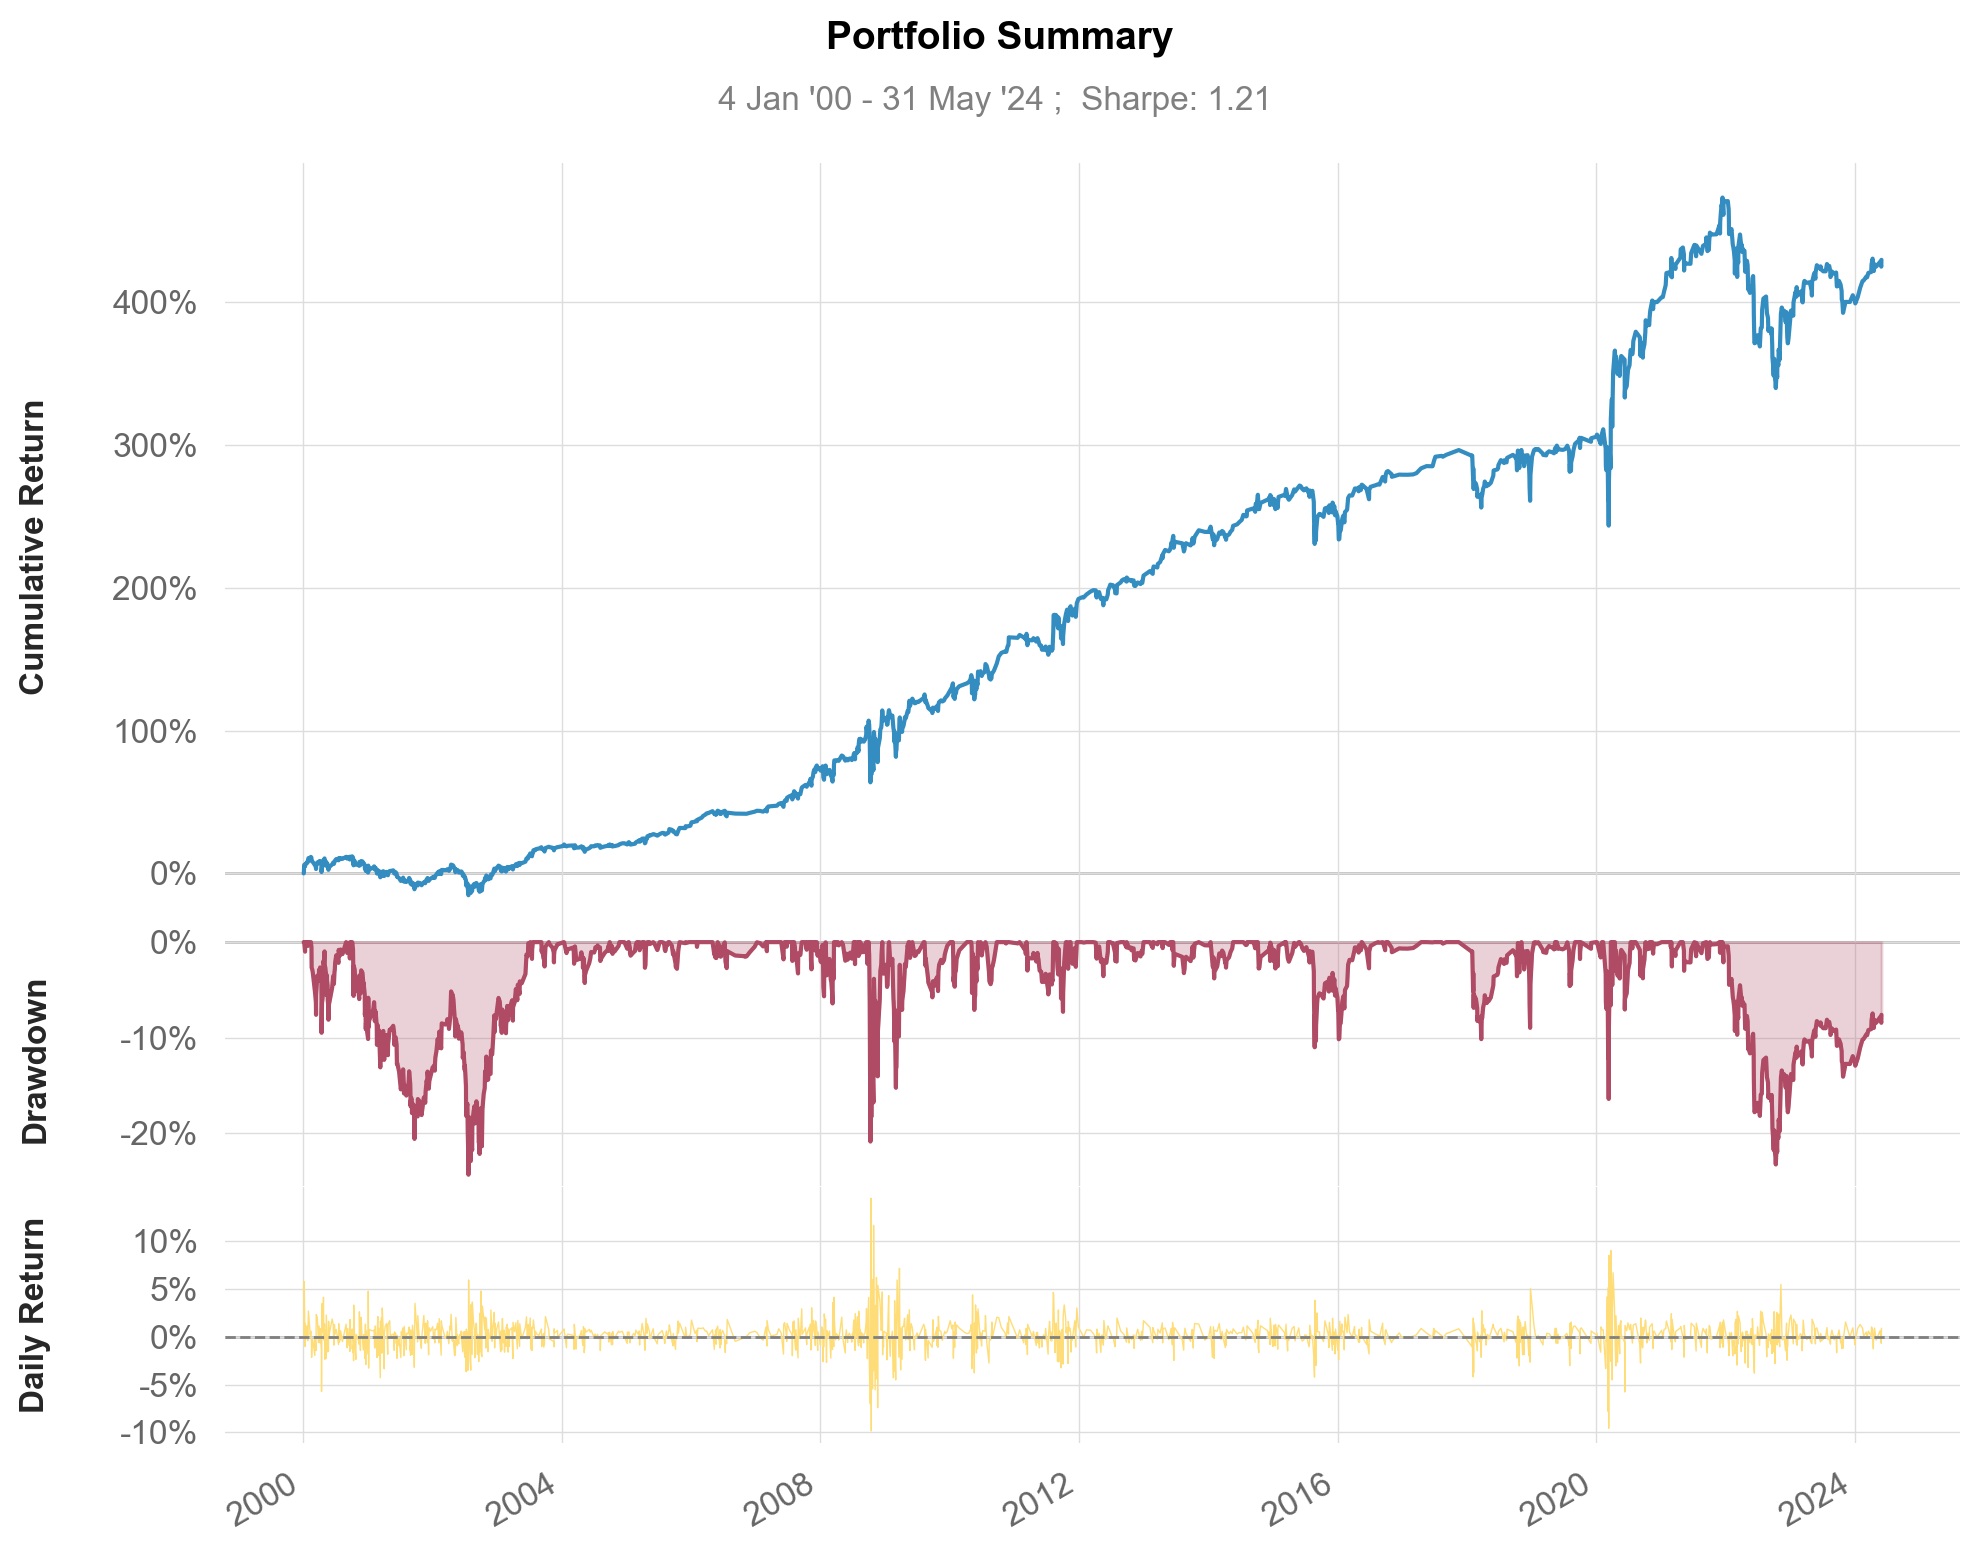

In [42]:
qs.plots.snapshot(df['Strategy'])

In [44]:
qs.reports.metrics(df['Strategy'], benchmark=df['SPY'], mode="full")

C:\Users\itay\.conda\envs\algotrade\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\itay\.conda\envs\algotrade\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\itay\.conda\envs\algotrade\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return 

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2000-01-05   2000-01-05
End Period                 2024-05-31   2024-05-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          485.37%      428.86%
CAGR﹪                     5.12%        4.82%

Sharpe                     0.96         1.21
Prob. Sharpe Ratio         99.07%       99.86%
Smart Sharpe               0.82         1.04
Sortino                    1.51         1.85
Smart Sortino              1.3          1.6
Sortino/√2                 1.07         1.31
Smart Sortino/√2           0.92         1.13
Omega                      1.26         1.26

Max Drawdown               -54.66%      -24.35%
Longest DD Days            2249         995
Volatility (ann.)          39.26%       26.01%
R^2                        0.45         0.45
Information Ratio          -0.01        -0.01
Calmar             

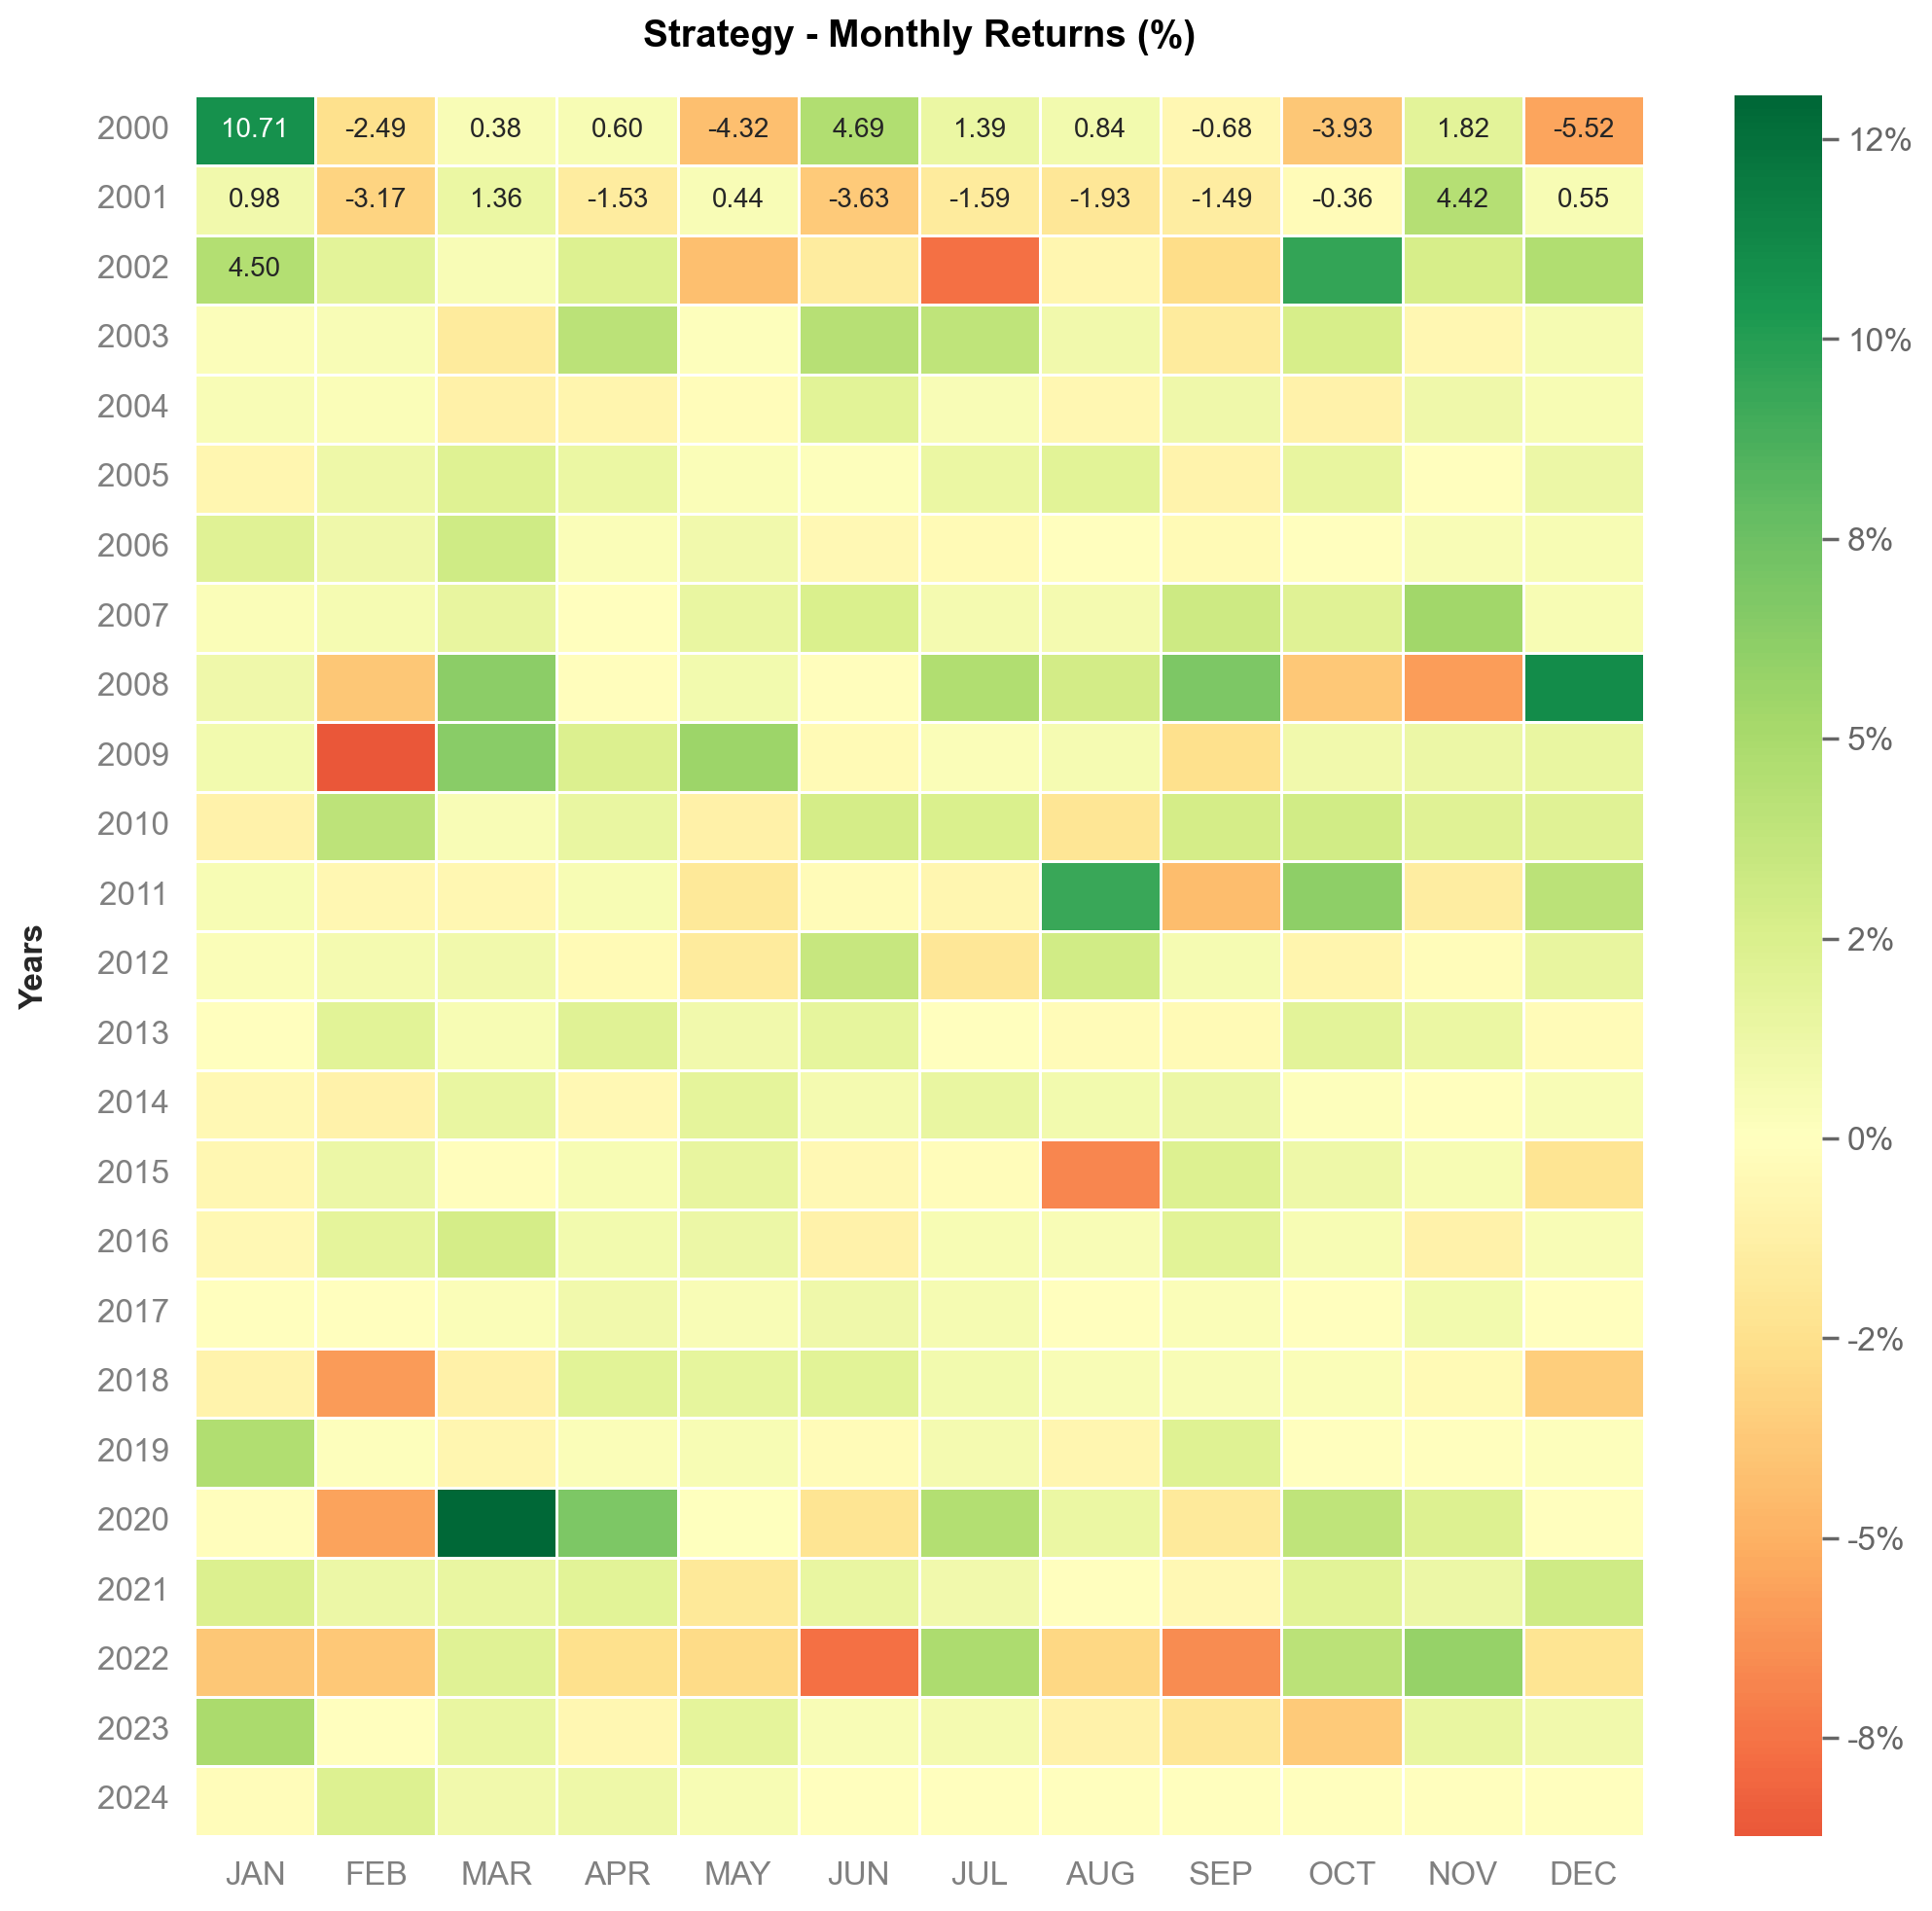

In [45]:
qs.plots.monthly_heatmap(df['Strategy'])

# Optimizing

## The Strategy

- GO LONG where 50-day SMA >= 100-day SMA
- GO SHORT where 50-day SMA < 100-day SMA


## Visualize

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

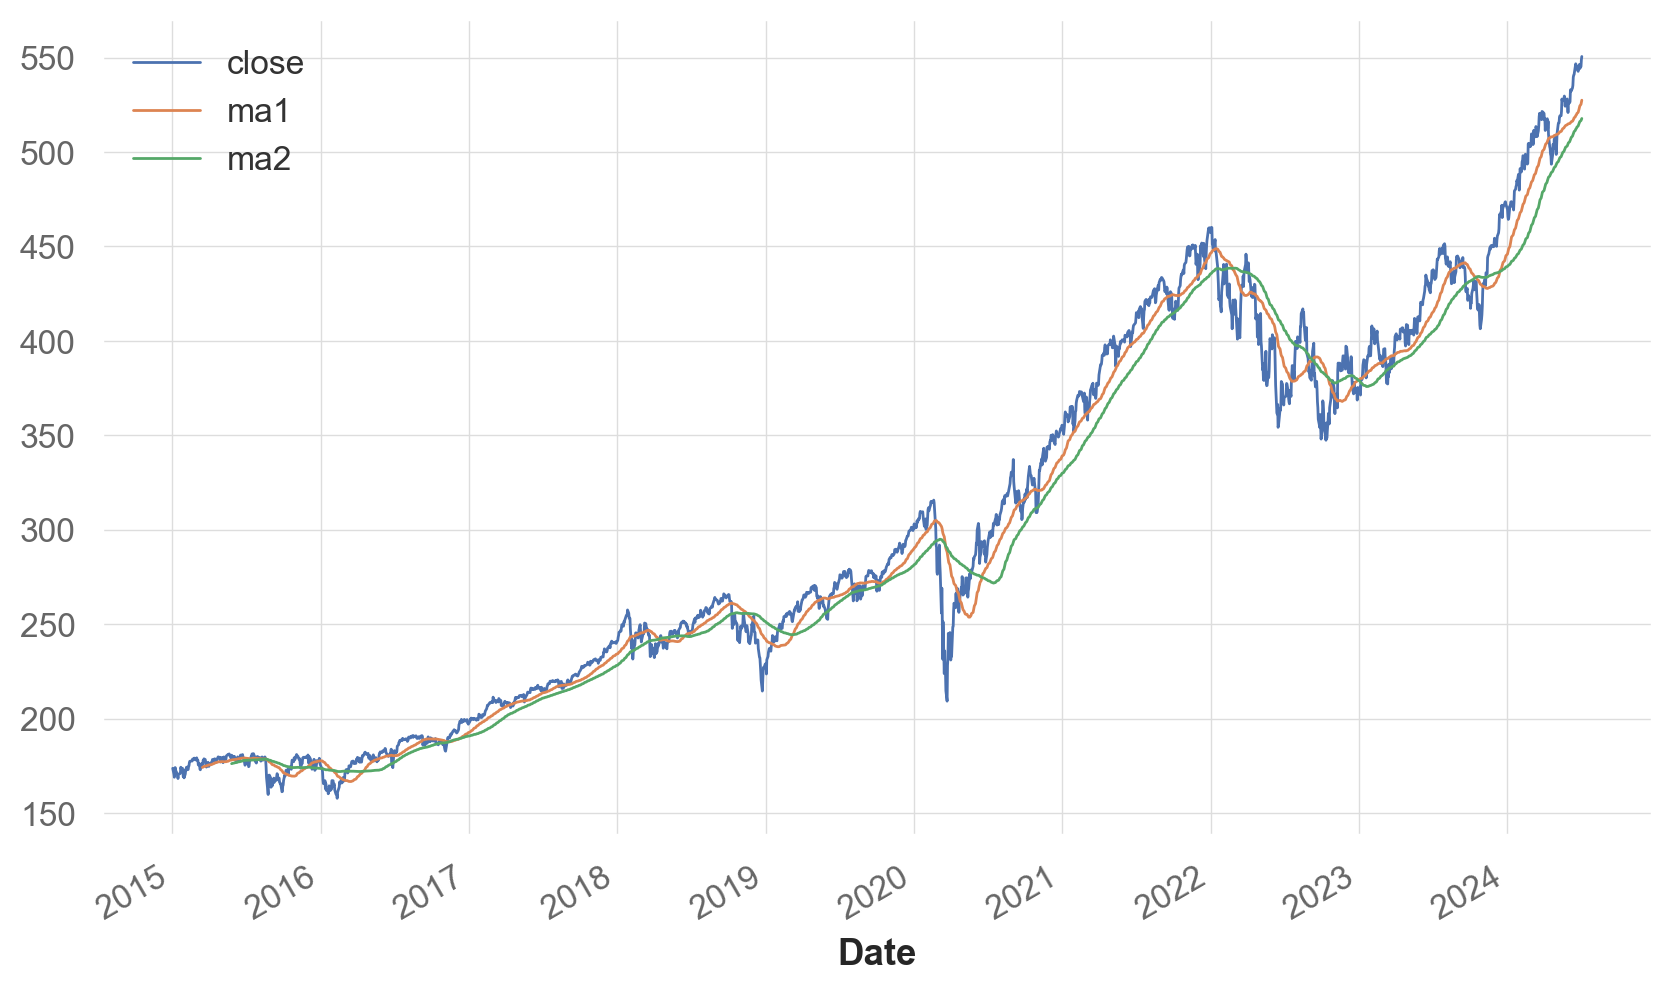

In [46]:
df = yf.download('SPY', start='2015-01-01', auto_adjust=True)
df.columns = map(str.lower, df.columns)

df['ma1'] = df['close'].rolling(window=50).mean()
df['ma2'] = df['close'].rolling(window=100).mean()

df[['close', 'ma1', 'ma2']].plot(linewidth=1)

## Prototype

<Axes: xlabel='Date'>

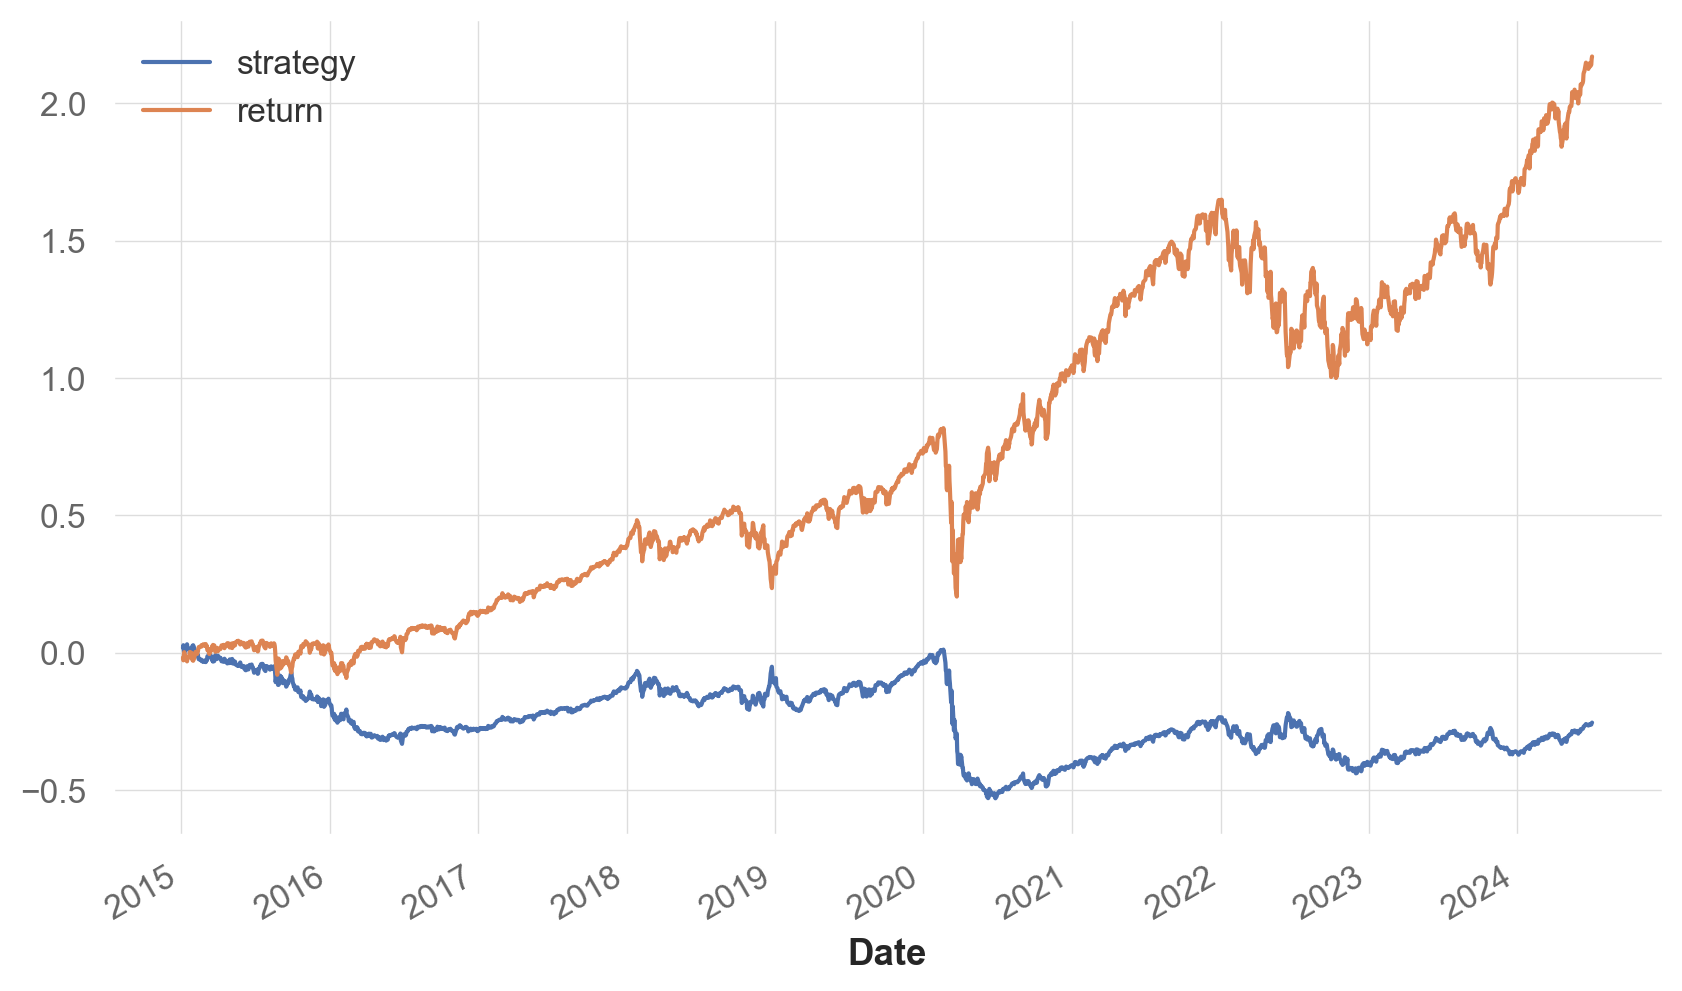

In [47]:
df['return'] = df['close'].pct_change()

df['strategy'] = df['return'] * np.where(
    df['ma1'].shift(1) >= df['ma2'].shift(1), 1, -1)

df[['strategy', 'return']].compsum().plot()

## Let's parameterize this strategy...

In [48]:
import numba

@numba.jit(forceobj=True)
def ma_strategy(prices, ma_fast, ma_slow):

    # create dataframe
    df = pd.DataFrame(data={"price": prices})

    # returns column
    df['return'] = df['price'].pct_change(1)
    
    # parameters
    df['ma1'] = df['price'].rolling(window=ma_fast).mean()
    df['ma2'] = df['price'].rolling(window=ma_slow).mean()
    
    # strategy
    df['strategy'] = df['return'] * np.where(
        df['ma1'].shift(1) >= df['ma2'].shift(1), 1, -1)

    return df['strategy'].fillna(0)

### Create moving average ranges

In [49]:
ma1 = np.linspace(5, 50, 20).astype(int)
ma2 = np.linspace(100, 200, 21).astype(int)

print("MA1 =", ma1)
print("MA2 =", ma2)

MA1 = [ 5  7  9 12 14 16 19 21 23 26 28 31 33 35 38 40 42 45 47 50]
MA2 = [100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185
 190 195 200]


### Create metrics placeholder grids

In [50]:
sharpes = np.zeros((len(ma1), len(ma2)))
returns = np.zeros(sharpes.shape)
drawdowns = np.zeros(sharpes.shape)

## Optimize

In [51]:
# loop over ma1/ma2 combination and collect stats

train = df[:-250].copy()

for i1, ma1_val in enumerate(ma1):
    for i2, ma2_val in enumerate(ma2):
        pnl = ma_strategy(train['close'], ma1_val, ma2_val)

        sharpes[i1, i2] = pnl.sharpe()
        returns[i1, i2] = pnl.cagr()
        drawdowns[i1, i2] = pnl.max_drawdown()

### Results stored in `sharpes`, `returns` and `drawdowns`

In [52]:
pd.DataFrame(sharpes).loc[:5, :5]

,0,1,2,3,4,5
0,0.054204,0.126530,0.182626,0.209277,0.218658,0.274690
1,0.171245,0.285369,0.283783,0.316609,0.357548,0.272179
2,0.226703,0.208145,0.266421,0.306918,0.211979,0.260809
3,0.203663,0.187072,0.097025,0.088818,0.105439,0.155995
4,0.027171,0.087110,0.022771,-0.018107,-0.062589,0.056414
5,-0.149583,-0.114657,0.098249,0.096328,0.065314,0.113506


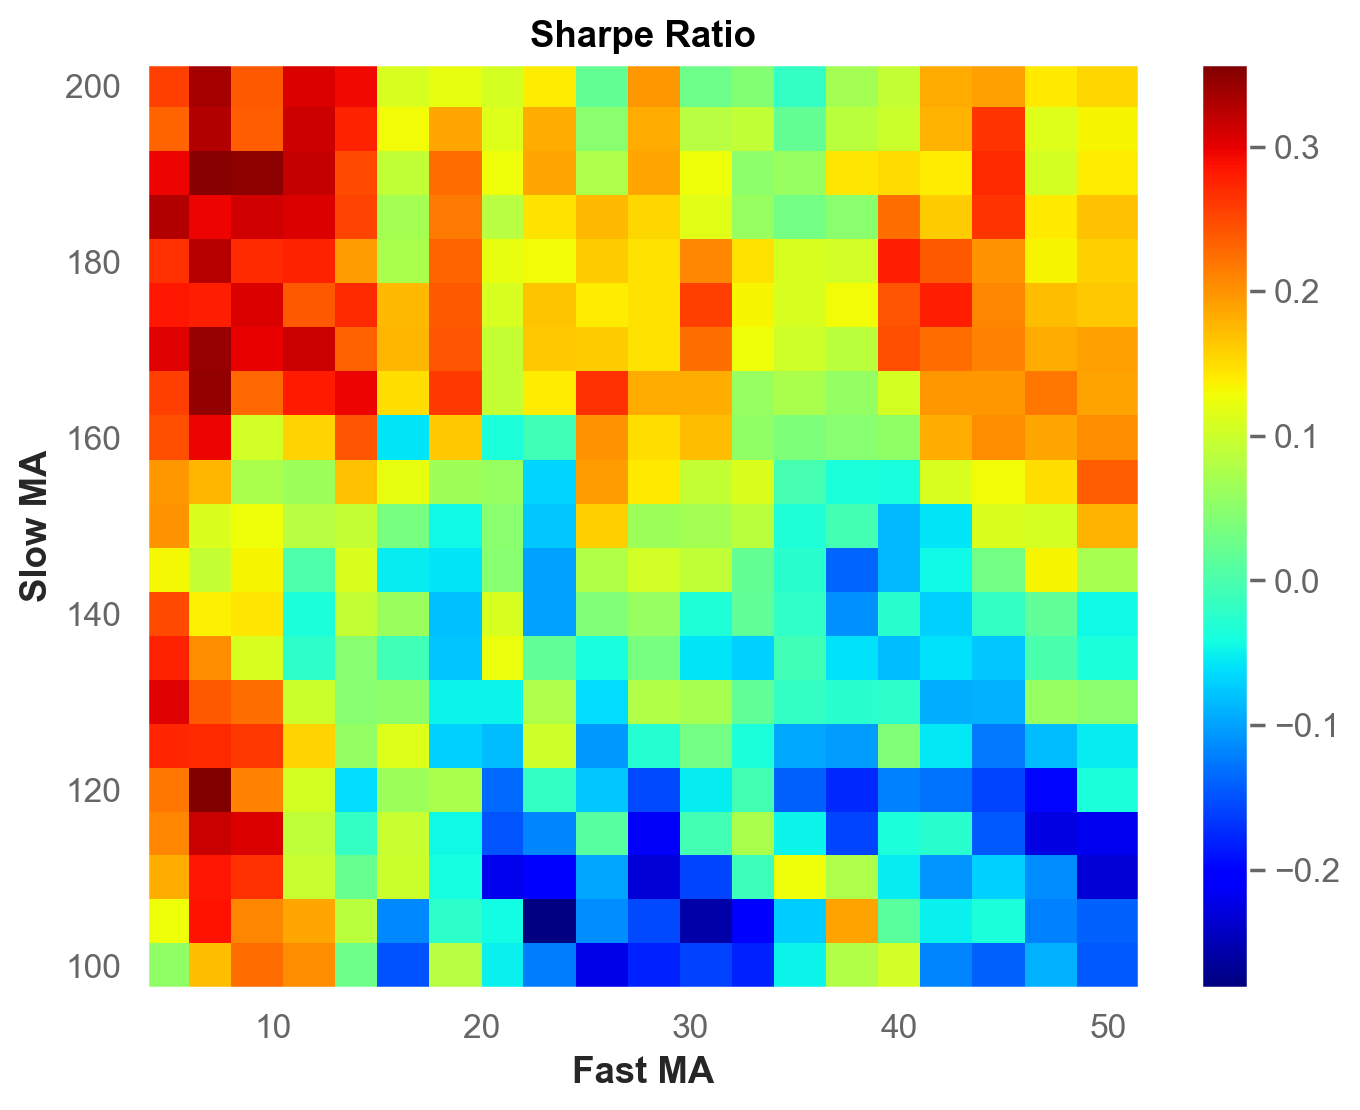

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.pcolormesh(ma1, ma2, sharpes.T, cmap="jet")
plt.title("Sharpe Ratio", fontweight="bold", color="black")
plt.xlabel("Fast MA")
plt.ylabel("Slow MA")
plt.colorbar()

## There's always simpler way :)

https://gist.github.com/ranaroussi/b87f45ca59f103128a01f7bc1372e00c

In [55]:
from optimizeparams import optimize2d

opt = optimize2d(train['close'], ma_strategy,
                 param1=ma1, param2=ma2,
                 param1_name="Fast MA",
                 param2_name="Slow MA")


print(tabulate(pd.DataFrame(opt.reveal()), 
               headers=['Metric', 'Sharpe', 'DD', 'CAGR', 'Volatility']))

NameError: name 'tabulate' is not defined

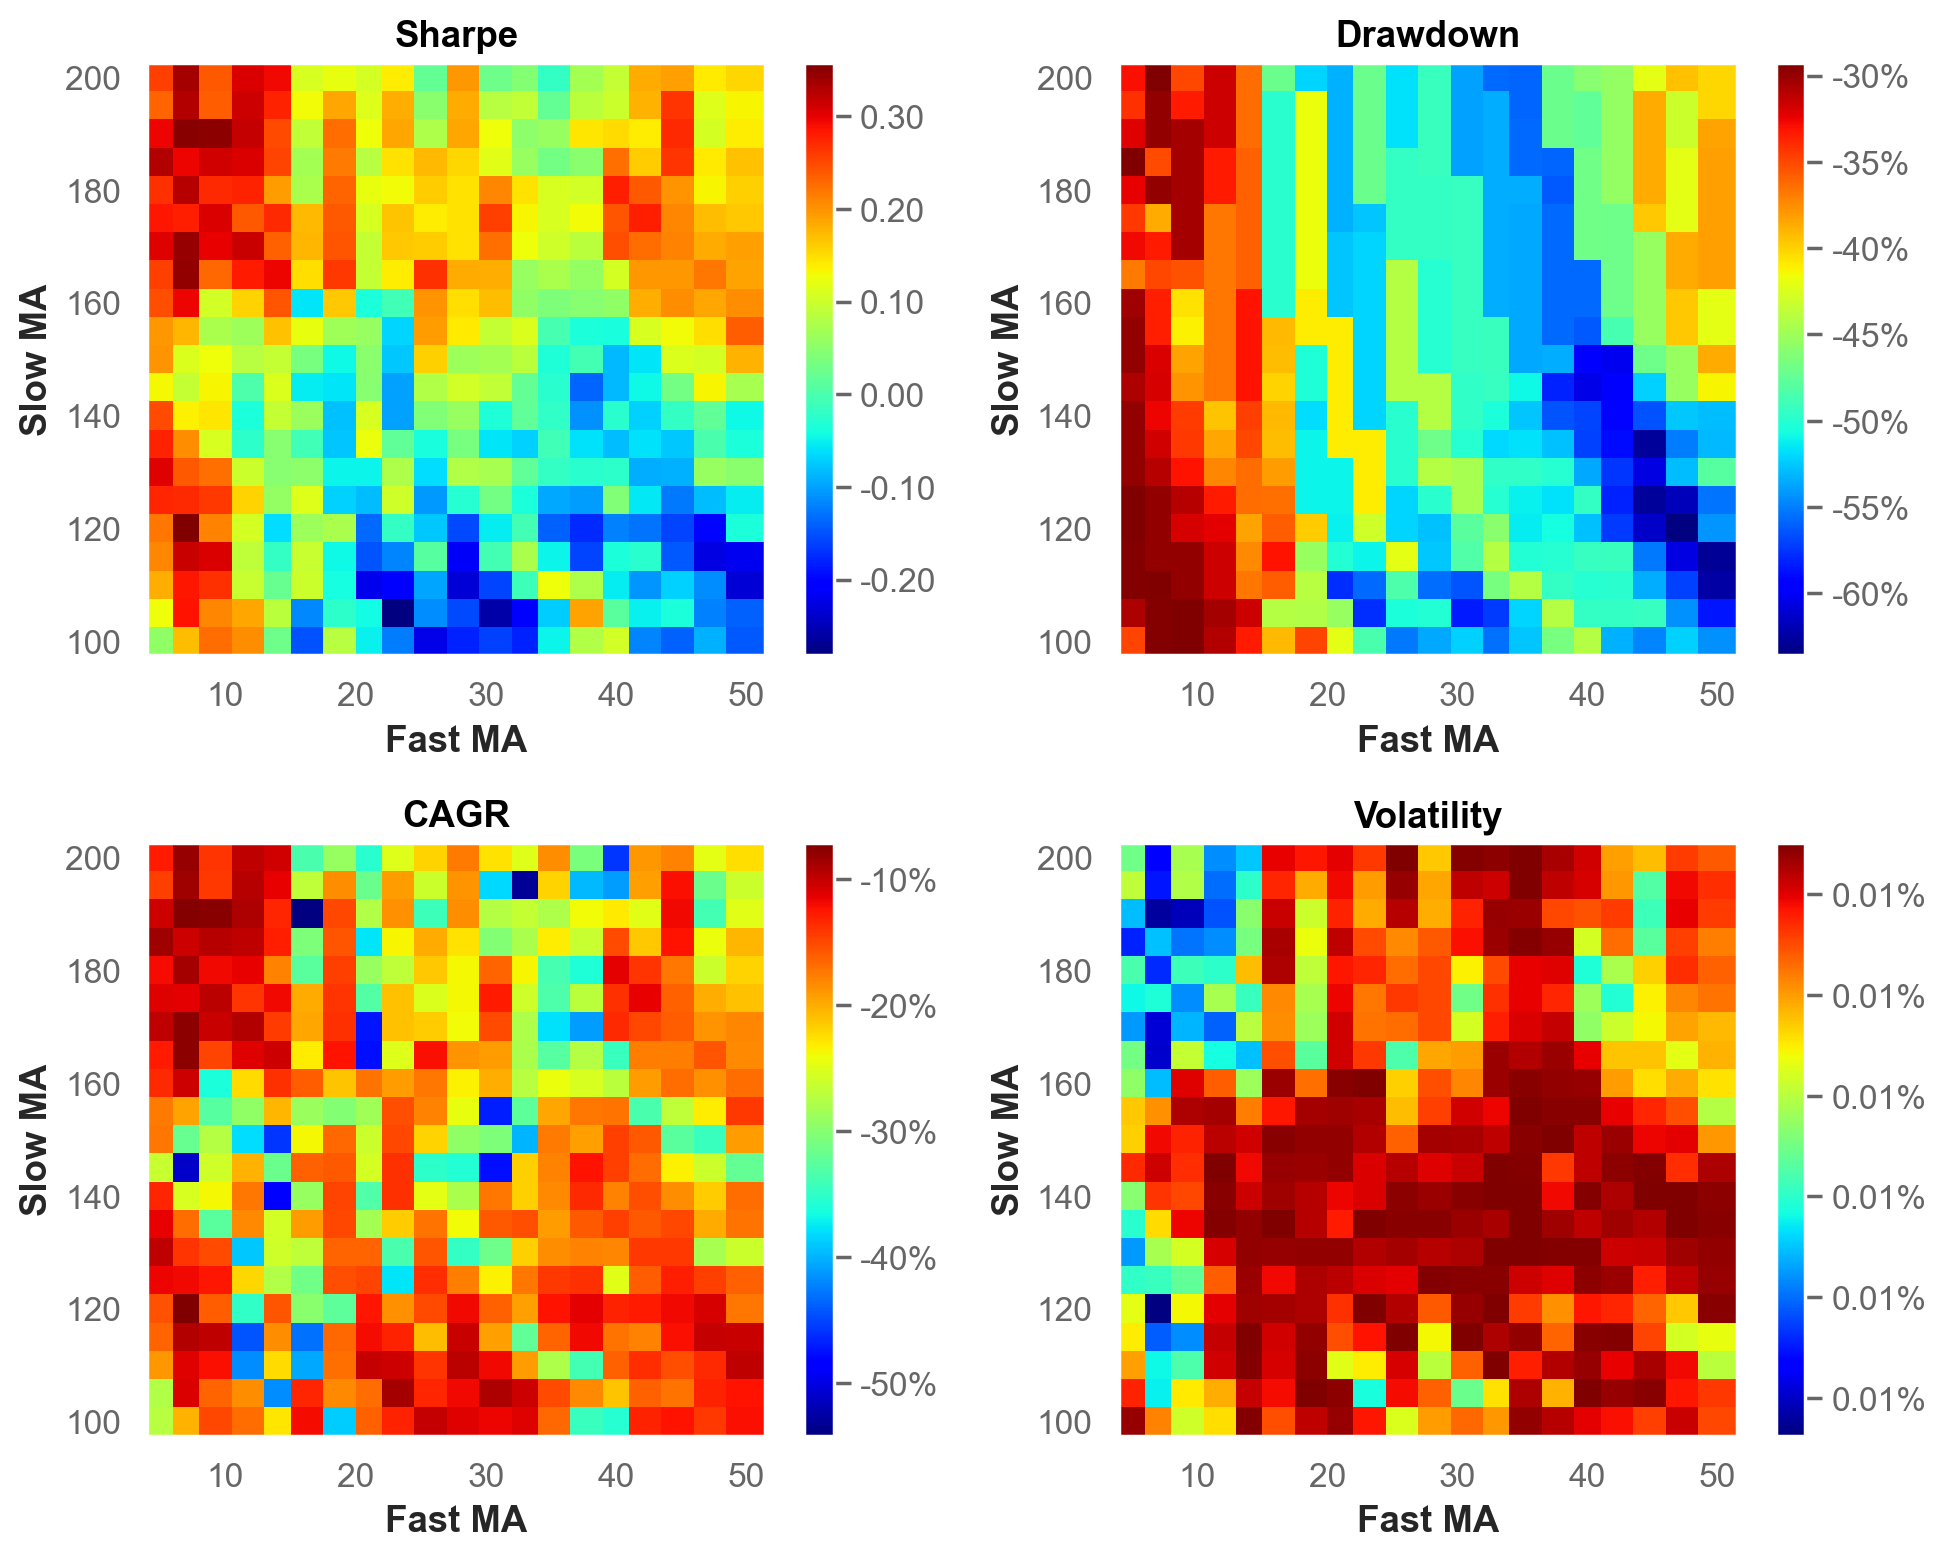

In [56]:
opt.plot()

In [57]:
opt.plot3d()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x600 with 0 Axes>

## Let's see the strategy using optimized params

In [58]:
optimal = list(opt.reveal()['sharpe'].values())

train['strategy'] = ma_strategy(
    train['close'], optimal[0], optimal[1])

print("Using: %.f-day Fast MA and %.f-day Slow MA" % (
    optimal[0], optimal[1]))

Using: 7-day Fast MA and 120-day Slow MA


                    Strategy
------------------  ----------
Start Period        2015-01-02
End Period          2023-07-06
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   51.46%
CAGR﹪              3.42%

Sharpe              0.36
Prob. Sharpe Ratio  85.11%
Sortino             0.5
Sortino/√2          0.35
Omega               1.07

Max Drawdown        -29.89%
Longest DD Days     1049

Gain/Pain Ratio     0.07
Gain/Pain (1M)      0.38

Payoff Ratio        0.94
Profit Factor       1.07
Common Sense Ratio  0.97
CPC Index           0.54
Tail Ratio          0.9
Outlier Win Ratio   4.1
Outlier Loss Ratio  4.12

MTD                 -0.82%
3M                  8.27%
6M                  5.75%
YTD                 6.57%
1Y                  -6.73%
3Y (ann.)           6.75%
5Y (ann.)           6.19%
10Y (ann.)          3.42%
All-time (ann.)     3.42%

Avg. Drawdown       -4.15%
Avg. Drawdown Days  62
Recovery Factor     1.87
Ulcer Index         0.12
Serenity Index      0.24


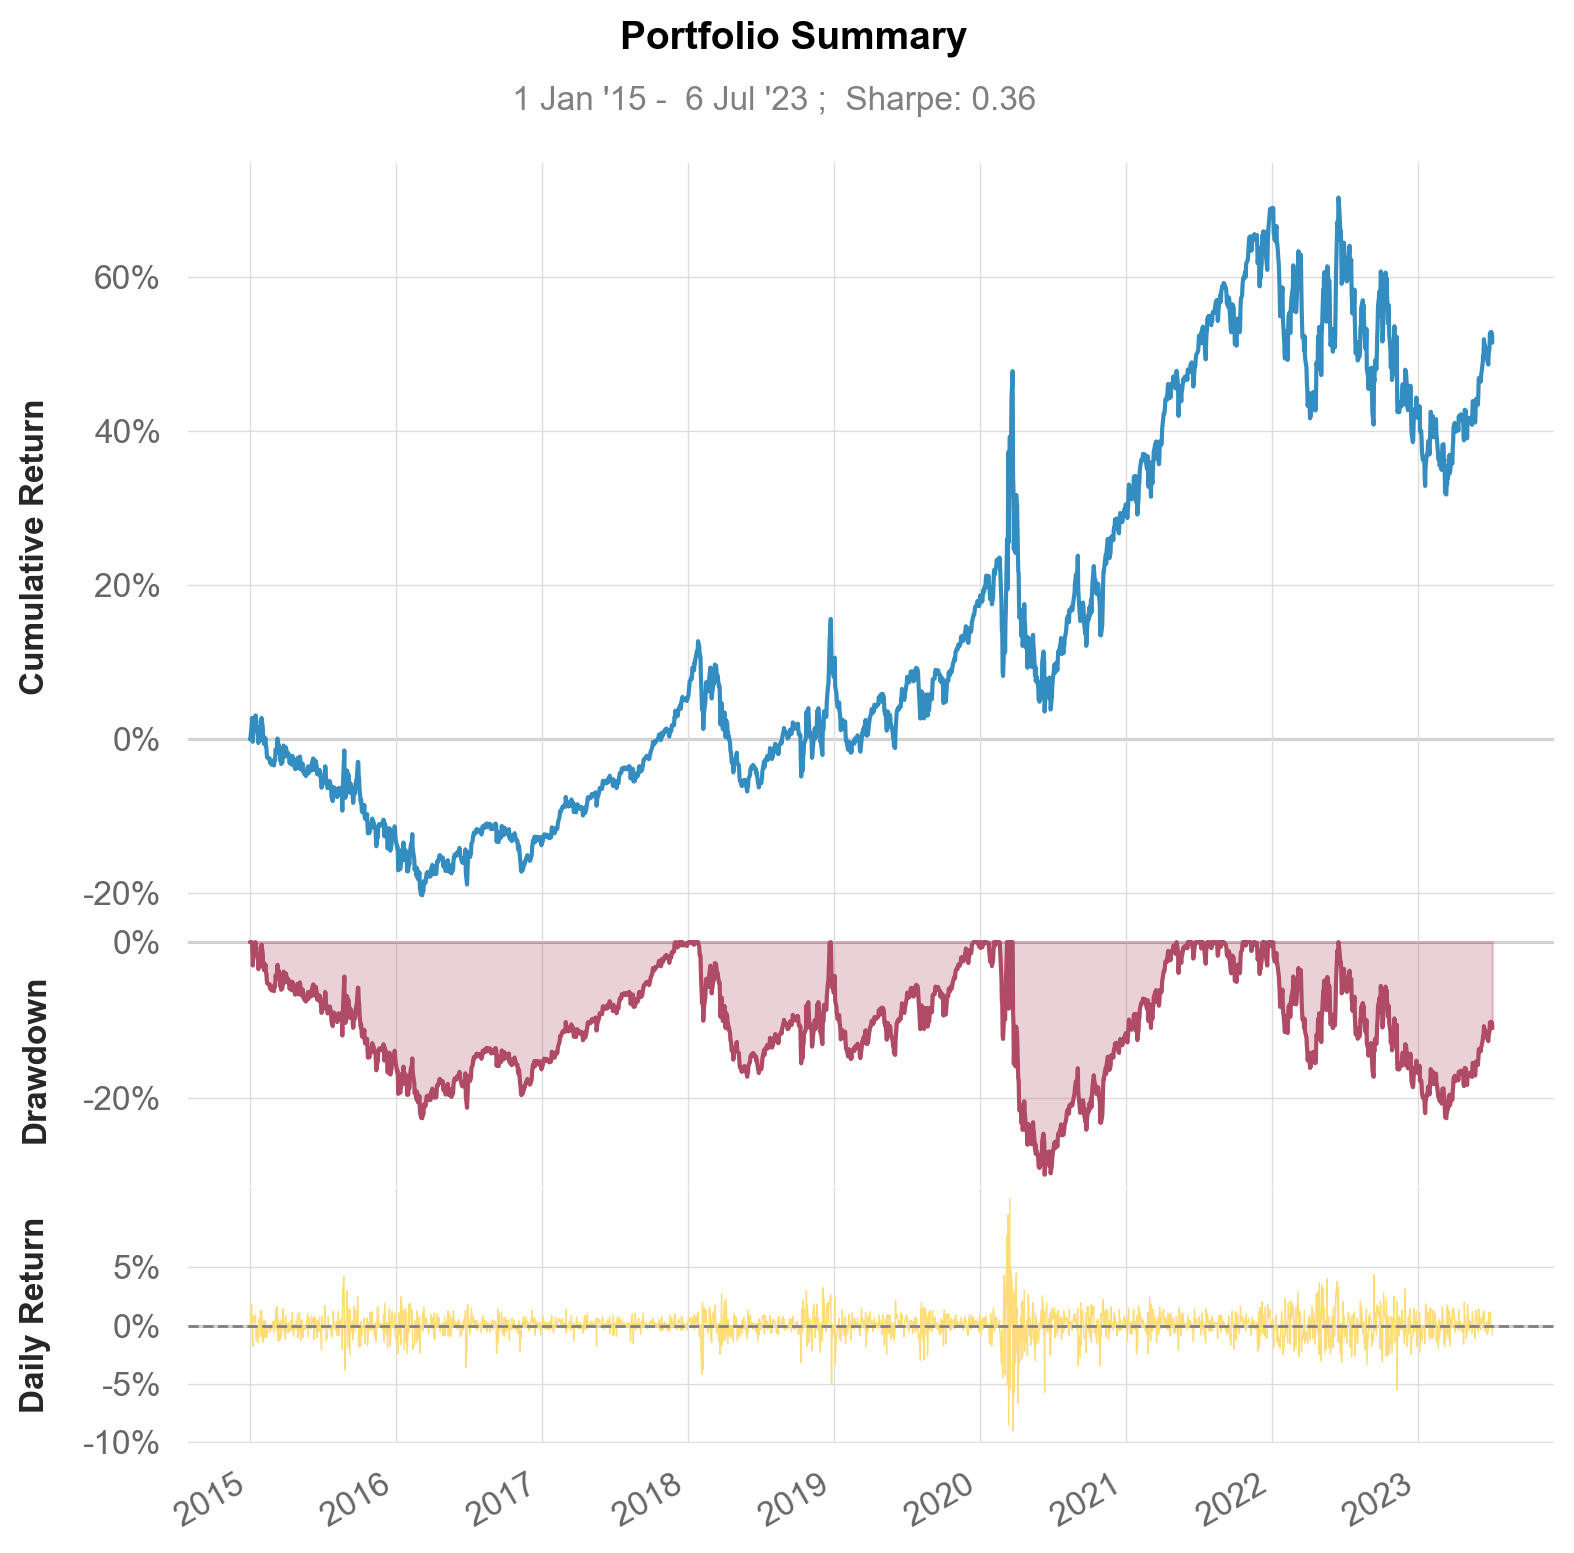

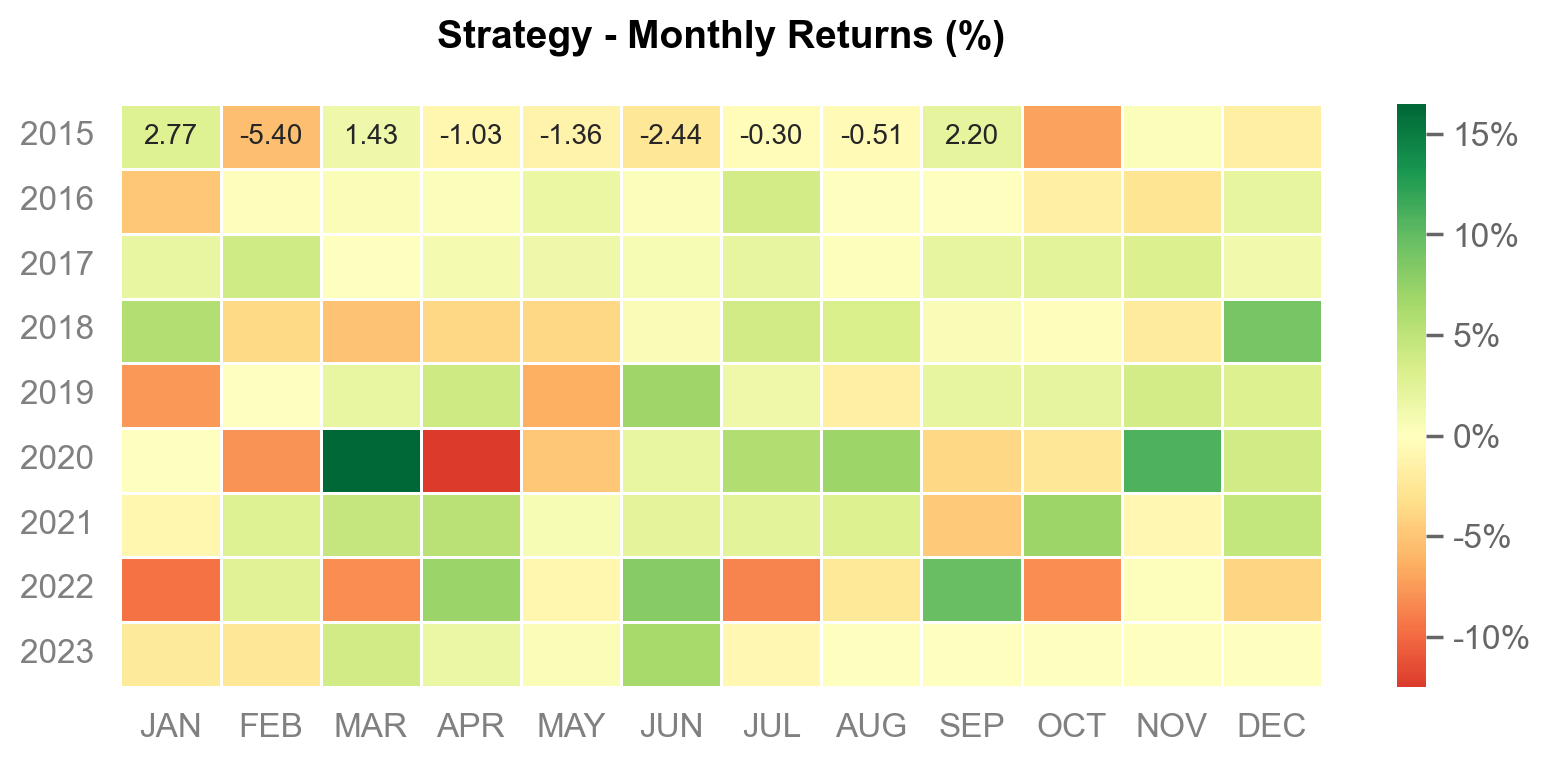

In [59]:
qs.reports.basic(train['strategy'])

## Will it hold?

                    Strategy
------------------  ----------
Start Period        2018-07-18
End Period          2024-07-03
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   76.37%
CAGR﹪              6.79%

Sharpe              0.57
Prob. Sharpe Ratio  91.92%
Sortino             0.82
Sortino/√2          0.58
Omega               1.12

Max Drawdown        -29.89%
Longest DD Days     726

Gain/Pain Ratio     0.12
Gain/Pain (1M)      0.57

Payoff Ratio        0.93
Profit Factor       1.12
Common Sense Ratio  1.04
CPC Index           0.57
Tail Ratio          0.93
Outlier Win Ratio   4.02
Outlier Loss Ratio  3.84

MTD                 1.17%
3M                  6.46%
6M                  17.23%
YTD                 16.57%
1Y                  13.89%
3Y (ann.)           2.96%
5Y (ann.)           7.22%
10Y (ann.)          6.79%
All-time (ann.)     6.79%

Avg. Drawdown       -4.0%
Avg. Drawdown Days  47
Recovery Factor     2.3
Ulcer Index         0.12
Serenity Index      0.34


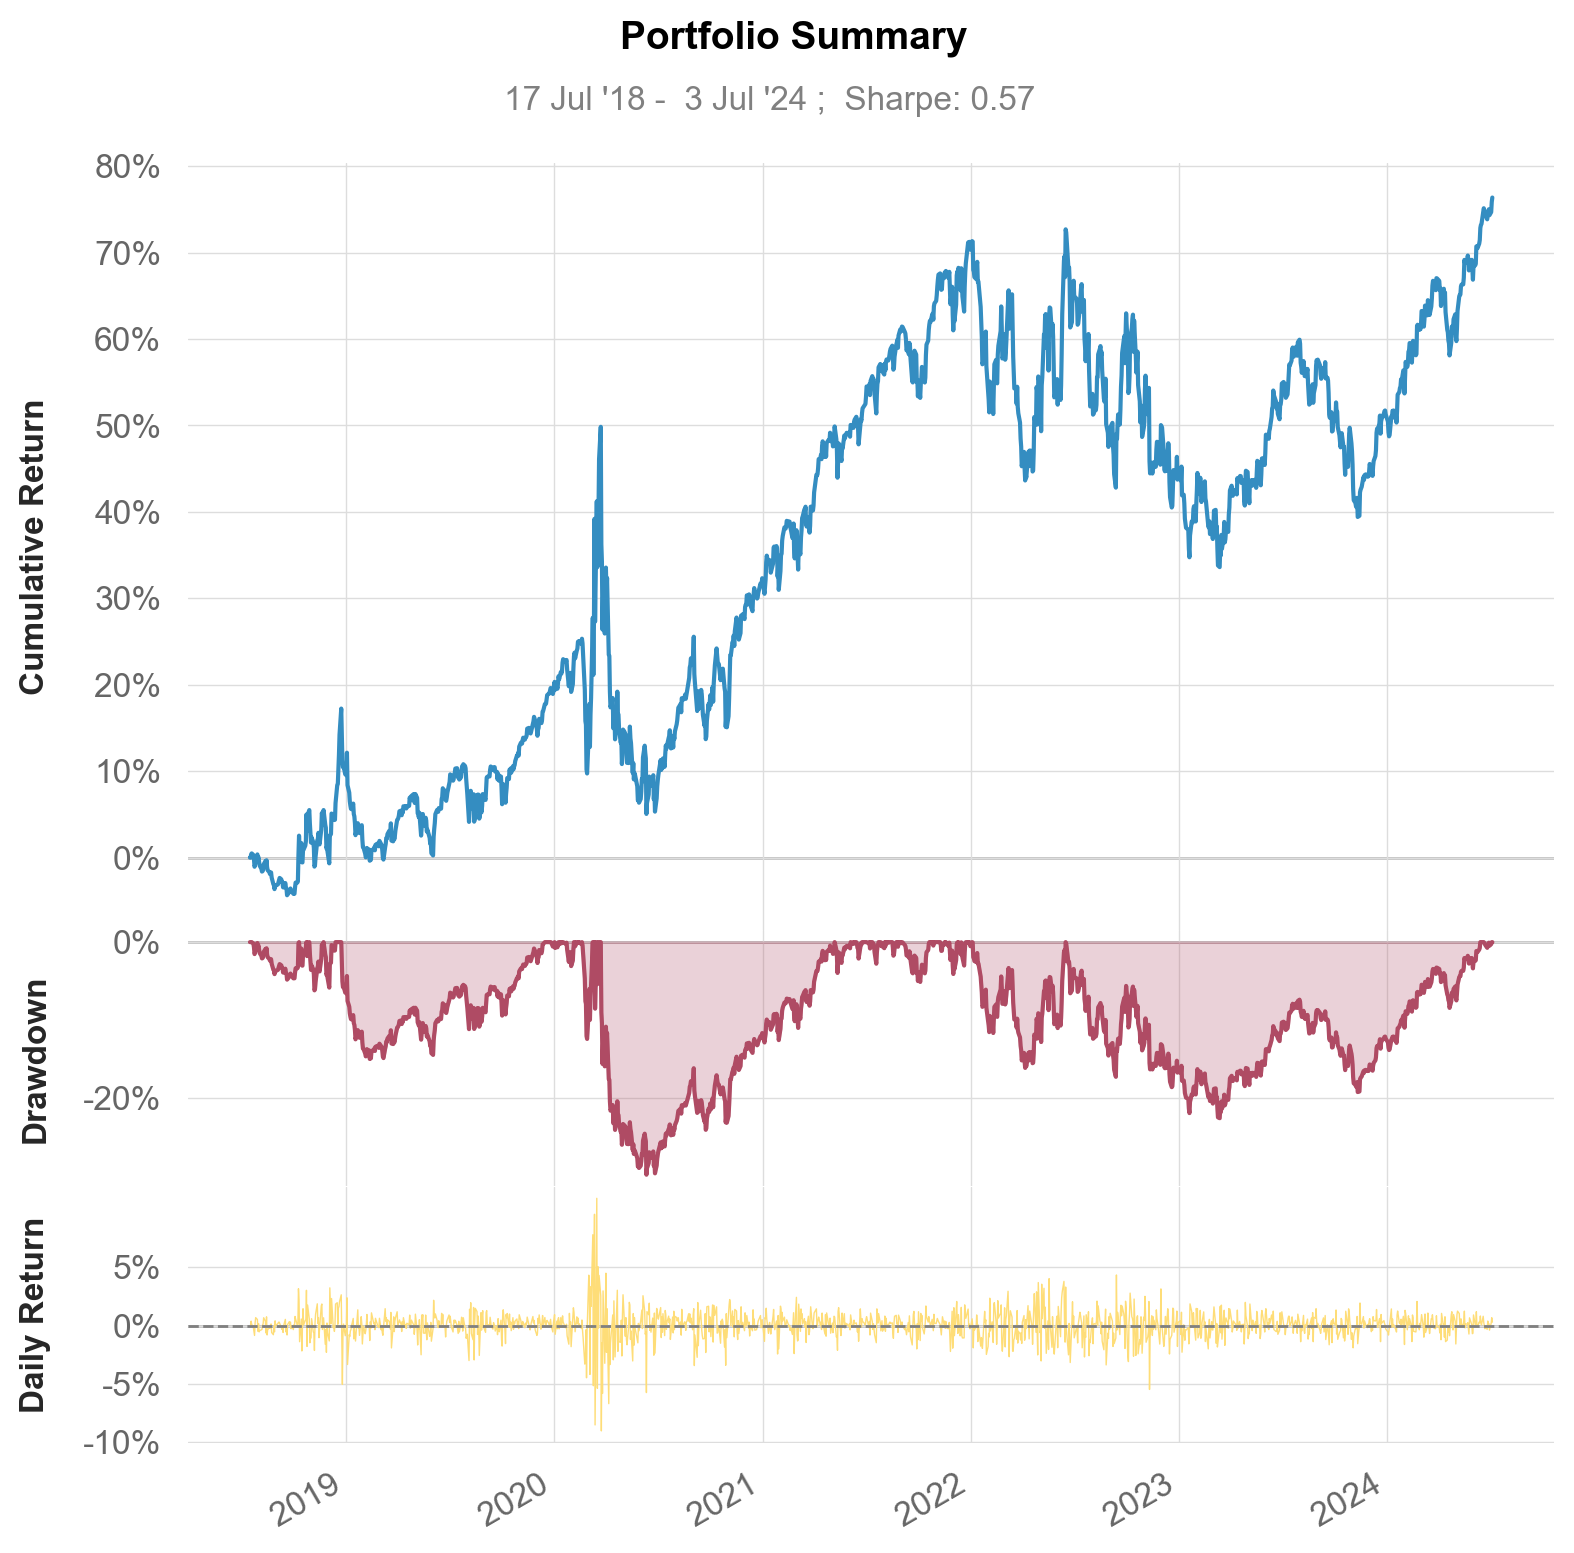

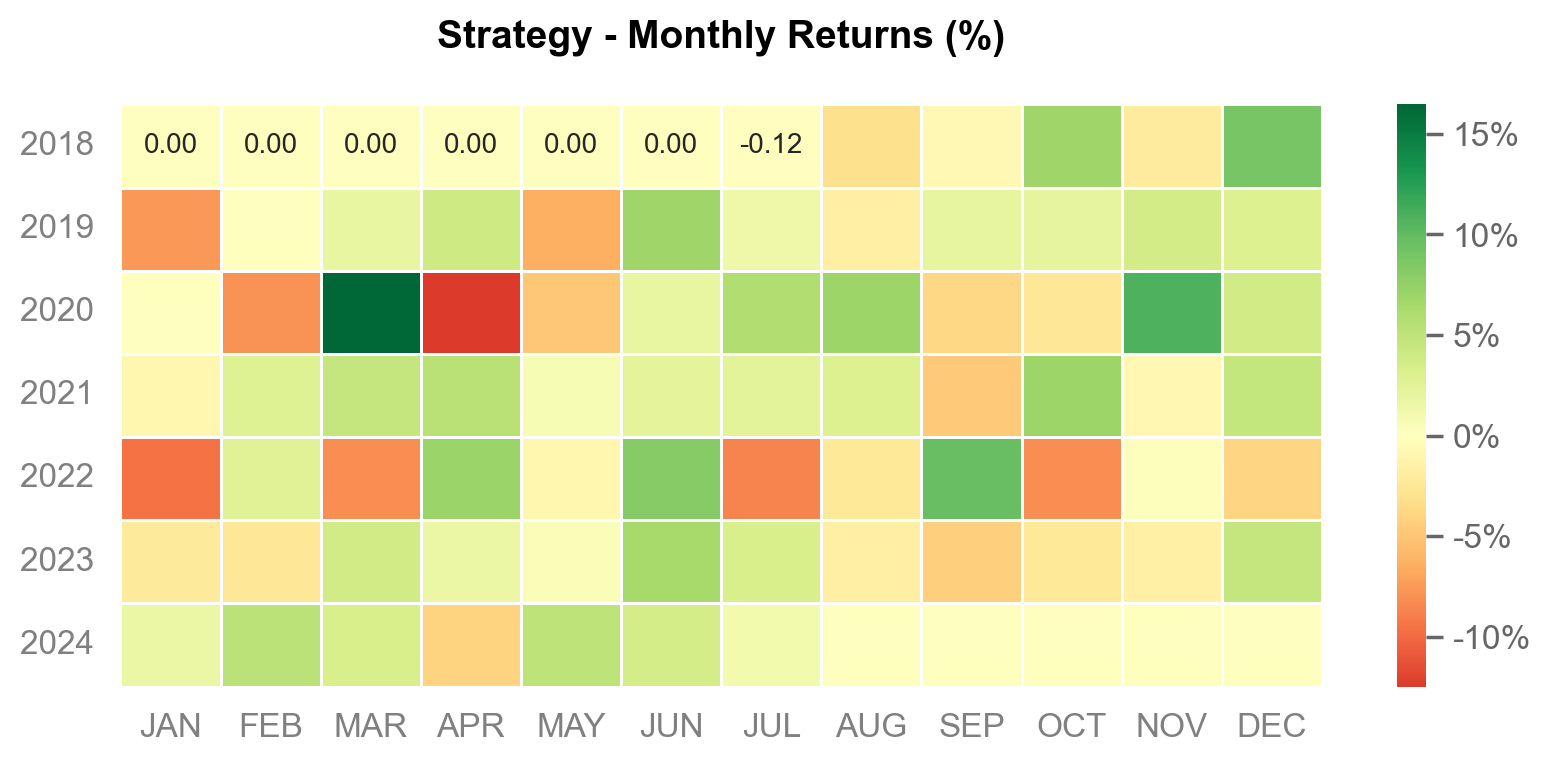

In [60]:
test = df[-1500:].copy()
test['strategy'] = ma_strategy(test['close'], optimal[0], optimal[1])
qs.reports.basic(test['strategy'])

# To summerize...

### Python is a great language for data-science and trading 😁

<h1 style="position:absolute;margin-top:0px">Python for Trading</h1>
<br clear="all">

---

### Thank you for your time!

<br>

**Ran Aroussi**<br>
Founder @ [Tradologics](http://tradologics.com)<br>
[@aroussi](http://twitter.com/aroussi) | [aroussi.com](http://aroussi.com) | [github.com/ranaroussi](https://github.com/ranaroussi)


<br><small>&copy; 2020. All rights reserved.</small>